## Data Cleaning Procedures

### Importing libraries

In [1]:
import numpy as np
import pandas as pd


In [2]:
## Importing our excel file with data please change accordingly to your workdirectory
df = pd.read_excel(r'C:\Users\AJ\Group Assignment\Project-withData.xlsx', sheet_name = 'Raw Data')
df

Period          Document type TALA Category Direction  \
0     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
1     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
2     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
3     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
4     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
...          ...                    ...           ...       ...   
1111  Q4 2021/22       Supplier receipt            PC  Outgoing   
1112  Q4 2021/22       Supplier receipt            PC  Outgoing   
1113  Q4 2021/22       Supplier receipt            PC  Outgoing   
1114  Q4 2021/22       Supplier receipt            PC  Outgoing   
1115  Q4 2021/22       Supplier receipt            PC  Outgoing   

            Items_group                  Item On-hand quantity Qty_in_stock  \
0     Finished Material         8338-15/F/244                0            0   
1     Finished Material  CLAR16177A-61/F/1340             2010     14272.34   
2     Finished Material   CLAR16489B-15/F/218              414            0   
3     Finished Material  CLAR16489B-15/F/218W               65            0   
4     Finished Material  CORR11477A-15/F209EP             1881            0   
...                 ...                   ...              ...          ...   
1111  Finished Material         Y-MY004/F/275           -21600        24340   
1112      Raw Materials      R-3533-15H/F/184            -3680      2472.64   
1113      Raw Materials      R-5435-61/F/1000           -36000       114877   
1114      Raw Materials       R-6532-15/F/180            -2160         3420   
1115           Services                Z-PF07               -1            3   

     Receipt_quantity  Stock_Value  ... Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0                   1       5.5537  ...         NaN         NaN         NaN   
1                2010  13759.53138  ...         NaN         NaN         NaN   
2                 414    2093.0184  ...         NaN         NaN         NaN   
3                1144    8767.1584  ...         NaN         NaN         NaN   
4                1881   16277.4216  ...         NaN         NaN         NaN   
...               ...          ...  ...         ...         ...         ...   
1111                0  -48940.5672  ...         NaN         NaN         NaN   
1112                0 -33941.10368  ...         NaN         NaN         NaN   
1113                0   -373404.96  ...         NaN         NaN         NaN   
1114                0 -75288.21048  ...         NaN         NaN         NaN   
1115                0  -1200.41148  ...         NaN         NaN         NaN   

     Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  \
0            NaN         NaN         NaN         NaN          NaN   
1            NaN         NaN         NaN         NaN          NaN   
2            NaN         NaN         NaN         NaN          NaN   
3            NaN         NaN         NaN         NaN          NaN   
4            NaN         NaN         NaN         NaN          NaN   
...          ...         ...         ...         ...          ...   
1111         NaN         NaN         NaN         NaN          NaN   
1112         NaN         NaN         NaN         NaN          NaN   
1113         NaN         NaN         NaN         NaN          NaN   
1114         NaN         NaN         NaN         NaN          NaN   
1115         NaN         NaN         NaN         NaN          NaN   

      Unnamed: 20  Unnamed: 21  
0             NaN          NaN  
1             NaN          NaN  
2             NaN          NaN  
3             NaN          NaN  
4             NaN          NaN  
...           ...          ...  
1111          NaN          NaN  
1112          NaN          NaN  
1113          NaN          NaN  
1114          NaN          NaN  
1115          NaN          NaN  

[1116 rows x 22 columns]

Converting all relevant columns to appropriate datatype

In [3]:
df['Period'] = df['Period'].astype(str) 
df['Document type'] = df['Document type'].astype(str) 
df['TALA Category'] = df['TALA Category'].astype(str)
df['Direction'] = df['Direction'].astype(str)
df['Items_group'] = df['Items_group'].astype(str)
df['Item'] = df['Item'].astype(str)
##### The code below automatically converts values that create an error and become NaN
#####e.g. non-numerical values or empty values like strings are automically changed to NaN
df['On-hand quantity'] = pd.to_numeric(df['On-hand quantity'], errors='coerce') 
df['Qty_in_stock'] = pd.to_numeric(df['Qty_in_stock'], errors='coerce') 
df['Receipt_quantity'] = pd.to_numeric(df['Receipt_quantity'], errors='coerce')
df['Stock_Value'] = pd.to_numeric(df['Stock_Value'], errors='coerce') 
df['Issue_quantity'] = pd.to_numeric(df['Issue_quantity'], errors='coerce') 

### Exploratory Data Analysis

In [4]:
df.dtypes ## Columns ['On-hand quantity' to 'Issue_quantity'] should be floats
## also lots of unnamed columns due to some data being in the wrong columns

Period               object
Document type        object
TALA Category        object
Direction            object
Items_group          object
Item                 object
On-hand quantity    float64
Qty_in_stock        float64
Receipt_quantity    float64
Stock_Value         float64
Issue_quantity      float64
Unnamed: 11          object
Unnamed: 12          object
Unnamed: 13          object
Unnamed: 14          object
Unnamed: 15          object
Unnamed: 16          object
Unnamed: 17         float64
Unnamed: 18         float64
Unnamed: 19         float64
Unnamed: 20         float64
Unnamed: 21         float64
dtype: object

In [5]:
df.Period.unique() ##Looking for empty cells

array(['Q1 2020/21', 'Q2 2020/21', 'Q3 2020/21', 'Q4 2020/21',
       'Q4 2020/25', 'Q4 2022/23', 'Q5 2020/21', 'Q6 2020/21',
       'Q1 2021/22', 'Q1 2023/24', ' ', 'Q2 2021/22', 'Q3 2021/22',
       'Q4 2021/22'], dtype=object)

Period contains "Q1 2023/24","Q4 2020/25", "Q4 2022/23", "Q5 2020/21"; these data don't make sense in the timeline of receipts, and cells with Q5 and Q6; There can be no quarters above 4,  and empty cells.

In [6]:
df.loc[df['Period'] == ' '] 

Period Document type TALA Category Direction        Items_group  \
712                                               Packing Materials   
713                                                   Raw Materials   
714                                                   Raw Materials   
715                                                   Raw Materials   
716                                                   Raw Materials   
717                                                        Services   

                 Item  On-hand quantity  Qty_in_stock  Receipt_quantity  \
712       C625-15/F/1             250.0          81.0             250.0   
713   R-2005-15/F/180            5400.0         809.0            5400.0   
714    R-321-15/F/162            3240.0         359.0            3240.0   
715  R-3533-15H/F/184           47840.0      126833.0           47840.0   
716   R-5435-15/F/215           51600.0           0.0           51600.0   
717         Z-EQTK015              26.0          80.0              26.0   

      Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
712   23963.30375  ...          NaN         NaN         NaN         NaN   
713   33666.72660  ...          NaN         NaN         NaN         NaN   
714   18693.69840  ...          NaN         NaN         NaN         NaN   
715  282589.73184  ...          NaN         NaN         NaN         NaN   
716  487289.50200  ...          NaN         NaN         NaN         NaN   
717   10556.00000  ...          NaN         NaN         NaN         NaN   

    Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  
712         NaN         NaN         NaN          NaN          NaN          NaN  
713         NaN         NaN         NaN          NaN          NaN          NaN  
714         NaN         NaN         NaN          NaN          NaN          NaN  
715         NaN         NaN         NaN          NaN          NaN          NaN  
716         NaN         NaN         NaN          NaN          NaN          NaN  
717         NaN         NaN         NaN          NaN          NaN          NaN  

[6 rows x 22 columns]

In [7]:
df['Document type'].unique() ##Looking for empty cells

array(['Miscellaneous receipt', 'Miscellaneous issue', 'Supplier receipt',
       ' '], dtype=object)

In [8]:
df.loc[df['Document type'] == ' ']

Period Document type TALA Category Direction        Items_group  \
712                                               Packing Materials   
713                                                   Raw Materials   
714                                                   Raw Materials   
715                                                   Raw Materials   
716                                                   Raw Materials   
717                                                        Services   

                 Item  On-hand quantity  Qty_in_stock  Receipt_quantity  \
712       C625-15/F/1             250.0          81.0             250.0   
713   R-2005-15/F/180            5400.0         809.0            5400.0   
714    R-321-15/F/162            3240.0         359.0            3240.0   
715  R-3533-15H/F/184           47840.0      126833.0           47840.0   
716   R-5435-15/F/215           51600.0           0.0           51600.0   
717         Z-EQTK015              26.0          80.0              26.0   

      Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
712   23963.30375  ...          NaN         NaN         NaN         NaN   
713   33666.72660  ...          NaN         NaN         NaN         NaN   
714   18693.69840  ...          NaN         NaN         NaN         NaN   
715  282589.73184  ...          NaN         NaN         NaN         NaN   
716  487289.50200  ...          NaN         NaN         NaN         NaN   
717   10556.00000  ...          NaN         NaN         NaN         NaN   

    Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  
712         NaN         NaN         NaN          NaN          NaN          NaN  
713         NaN         NaN         NaN          NaN          NaN          NaN  
714         NaN         NaN         NaN          NaN          NaN          NaN  
715         NaN         NaN         NaN          NaN          NaN          NaN  
716         NaN         NaN         NaN          NaN          NaN          NaN  
717         NaN         NaN         NaN          NaN          NaN          NaN  

[6 rows x 22 columns]

In [9]:
df['TALA Category'].unique() ##Looking for empty cells

array(['PA', 'PB', 'PC', ' '], dtype=object)

In [10]:
df.loc[df['TALA Category'] == ' ']

Period Document type TALA Category Direction        Items_group  \
712                                               Packing Materials   
713                                                   Raw Materials   
714                                                   Raw Materials   
715                                                   Raw Materials   
716                                                   Raw Materials   
717                                                        Services   

                 Item  On-hand quantity  Qty_in_stock  Receipt_quantity  \
712       C625-15/F/1             250.0          81.0             250.0   
713   R-2005-15/F/180            5400.0         809.0            5400.0   
714    R-321-15/F/162            3240.0         359.0            3240.0   
715  R-3533-15H/F/184           47840.0      126833.0           47840.0   
716   R-5435-15/F/215           51600.0           0.0           51600.0   
717         Z-EQTK015              26.0          80.0              26.0   

      Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
712   23963.30375  ...          NaN         NaN         NaN         NaN   
713   33666.72660  ...          NaN         NaN         NaN         NaN   
714   18693.69840  ...          NaN         NaN         NaN         NaN   
715  282589.73184  ...          NaN         NaN         NaN         NaN   
716  487289.50200  ...          NaN         NaN         NaN         NaN   
717   10556.00000  ...          NaN         NaN         NaN         NaN   

    Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  
712         NaN         NaN         NaN          NaN          NaN          NaN  
713         NaN         NaN         NaN          NaN          NaN          NaN  
714         NaN         NaN         NaN          NaN          NaN          NaN  
715         NaN         NaN         NaN          NaN          NaN          NaN  
716         NaN         NaN         NaN          NaN          NaN          NaN  
717         NaN         NaN         NaN          NaN          NaN          NaN  

[6 rows x 22 columns]

In [11]:
df['Direction'].unique() ##Looking for empty cells

array(['Incoming', 'Outgoing', ' '], dtype=object)

In [12]:
df['Items_group'].unique() ##Looking for empty cells 

array(['Finished Material', 'Packing Materials', 'Raw Materials',
       'Services', 'xxx'], dtype=object)

In [13]:
df.loc[df['Items_group'] == 'xxx'] ##Rows where "xxx" is contained 

Period        Document type TALA Category Direction Items_group  \
624  Q1 2021/22  Miscellaneous issue            PA  Outgoing         xxx   
625  Q1 2021/22  Miscellaneous issue            PA  Outgoing         xxx   
626  Q1 2021/22  Miscellaneous issue            PA  Outgoing         xxx   
627  Q1 2021/22  Miscellaneous issue            PA  Outgoing         xxx   
628  Q1 2021/22  Miscellaneous issue            PC  Outgoing         xxx   

                     Item  On-hand quantity  Qty_in_stock  Receipt_quantity  \
624   L-1539M-15/F/204/EQ          -2936.00        4981.0               0.0   
625   L-844M-15/F/204/TML           -778.00        2798.0               0.0   
626  V-20351M-61/F/1035/T          -4122.05       14268.0               0.0   
627     V-20354M-15/F/202           -239.56        1538.4               0.0   
628        Y-MY007/F/1400           -122.00       28697.0               0.0   

       Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
624  -64125.096728  ...          NaN         NaN         NaN         NaN   
625  -17849.382478  ...          NaN         NaN         NaN         NaN   
626 -110669.161141  ...          NaN         NaN         NaN         NaN   
627   -7743.596132  ...          NaN         NaN         NaN         NaN   
628    -649.513604  ...          NaN         NaN         NaN         NaN   

    Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  
624         NaN         NaN         NaN          NaN          NaN          NaN  
625         NaN         NaN         NaN          NaN          NaN          NaN  
626         NaN         NaN         NaN          NaN          NaN          NaN  
627         NaN         NaN         NaN          NaN          NaN          NaN  
628         NaN         NaN         NaN          NaN          NaN          NaN  

[5 rows x 22 columns]

In [14]:
df['Item'].nunique() #Checking the no. of unique items

238

In [15]:
df.loc[df['Item'] == ' '] ##Looking for empty cells

Empty DataFrame
Columns: [Period, Document type, TALA Category, Direction, Items_group, Item, On-hand quantity, Qty_in_stock, Receipt_quantity, Stock_Value, Issue_quantity, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21]
Index: []

[0 rows x 22 columns]

In [16]:
df.loc[711:718] ### Where missing data pt. 1

Period     Document type TALA Category Direction        Items_group  \
711  Q1 2021/22  Supplier receipt            PC  Incoming  Finished Material   
712                                                        Packing Materials   
713                                                            Raw Materials   
714                                                            Raw Materials   
715                                                            Raw Materials   
716                                                            Raw Materials   
717                                                                 Services   
718  Q1 2021/22  Supplier receipt            PC  Incoming  Packing Materials   

                 Item  On-hand quantity  Qty_in_stock  Receipt_quantity  \
711     Y-MY009/F/245            1470.0           0.0            1470.0   
712       C625-15/F/1             250.0          81.0             250.0   
713   R-2005-15/F/180            5400.0         809.0            5400.0   
714    R-321-15/F/162            3240.0         359.0            3240.0   
715  R-3533-15H/F/184           47840.0      126833.0           47840.0   
716   R-5435-15/F/215           51600.0           0.0           51600.0   
717         Z-EQTK015              26.0          80.0              26.0   
718       C625-15/F/1             250.0          81.0             250.0   

      Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
711    3308.25411  ...          NaN         NaN         NaN         NaN   
712   23963.30375  ...          NaN         NaN         NaN         NaN   
713   33666.72660  ...          NaN         NaN         NaN         NaN   
714   18693.69840  ...          NaN         NaN         NaN         NaN   
715  282589.73184  ...          NaN         NaN         NaN         NaN   
716  487289.50200  ...          NaN         NaN         NaN         NaN   
717   10556.00000  ...          NaN         NaN         NaN         NaN   
718   23963.30375  ...          NaN         NaN         NaN         NaN   

    Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  
711         NaN         NaN         NaN          NaN          NaN          NaN  
712         NaN         NaN         NaN          NaN          NaN          NaN  
713         NaN         NaN         NaN          NaN          NaN          NaN  
714         NaN         NaN         NaN          NaN          NaN          NaN  
715         NaN         NaN         NaN          NaN          NaN          NaN  
716         NaN         NaN         NaN          NaN          NaN          NaN  
717         NaN         NaN         NaN          NaN          NaN          NaN  
718         NaN         NaN         NaN          NaN          NaN          NaN  

[8 rows x 22 columns]

Our non-numerical fields/columns contain missing values and Item_group specifically contains 'xxx' which needs to be imputated with an appropriate value. 

    Period => Quarter + Year
    Document type => Type of receipt e.g. Supplier receipt
    TALA Category => not sure what it means 
    Direction => Incoming or Outgoing
    Item_group => Type of item
    Item => Item code/number

### Locating all NaN Values in our numerical columns

In [17]:
df.loc[df['On-hand quantity'].isna() == True]

Period          Document type TALA Category Direction    Items_group  \
435  Q4 2020/21  Miscellaneous receipt            PC  Incoming  Raw Materials   

               Item  On-hand quantity  Qty_in_stock  Receipt_quantity  \
435  R-321-15/F/162               NaN       1535.76             384.0   

     Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
435  3072.054144  ...          NaN         NaN         NaN         NaN   

    Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  
435         NaN         NaN         NaN          NaN          NaN          NaN  

[1 rows x 22 columns]

**Missing Value at index=435 at On-hand quantity**

In [18]:
df.loc[df['Qty_in_stock'].isna() == True]

Period          Document type TALA Category Direction  \
436  Q4 2020/21  Miscellaneous receipt            PC  Incoming   
701  Q1 2021/22       Supplier receipt            PC  Incoming   
702  Q1 2021/22       Supplier receipt            PC  Incoming   
703  Q1 2021/22       Supplier receipt            PC  Incoming   
704  Q1 2021/22       Supplier receipt            PC  Incoming   
705  Q1 2021/22       Supplier receipt            PC  Incoming   
706  Q1 2021/22       Supplier receipt            PC  Incoming   

           Items_group               Item  On-hand quantity  Qty_in_stock  \
436      Raw Materials   R-3533-15H/F/184             113.0           NaN   
701  Finished Material  Y-MY0038-15/F/240            7200.0           NaN   
702  Finished Material      Y-MY004/F/275           44000.0           NaN   
703  Finished Material      Y-MY005/F/225           54000.0           NaN   
704  Finished Material     Y-MY007/F/1400          142800.0           NaN   
705  Finished Material      Y-MY009/F/245            1470.0           NaN   
706  Packing Materials        C625-15/F/1             250.0           NaN   

     Receipt_quantity  Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14  \
436             113.0  1042.213238  ...          NaN         NaN         NaN   
701               NaN          NaN  ...          NaN         NaN         NaN   
702               NaN          NaN  ...          NaN         NaN         NaN   
703               NaN          NaN  ...          NaN         NaN         NaN   
704               NaN          NaN  ...          NaN         NaN         NaN   
705               NaN          NaN  ...          NaN         NaN         NaN   
706               NaN          NaN  ...          NaN         NaN         NaN   

    Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  \
436         NaN         NaN         NaN         NaN          NaN          NaN   
701         NaN         NaN         NaN         NaN          NaN          NaN   
702         NaN         NaN         NaN         NaN          NaN          NaN   
703         NaN         NaN         NaN         NaN          NaN          NaN   
704         NaN         NaN         NaN         NaN          NaN          NaN   
705         NaN         NaN         NaN         NaN          NaN          NaN   
706         NaN         NaN         NaN         NaN          NaN          NaN   

     Unnamed: 21  
436          NaN  
701          NaN  
702          NaN  
703          NaN  
704          NaN  
705          NaN  
706          NaN  

[7 rows x 22 columns]

**Missing Value at index=436 and 701:706 for Qty_in_stock**

In [19]:
df.loc[df['Receipt_quantity'].isna() == True]

Period          Document type TALA Category Direction  \
437  Q4 2020/21  Miscellaneous receipt            PC  Incoming   
701  Q1 2021/22       Supplier receipt            PC  Incoming   
702  Q1 2021/22       Supplier receipt            PC  Incoming   
703  Q1 2021/22       Supplier receipt            PC  Incoming   
704  Q1 2021/22       Supplier receipt            PC  Incoming   
705  Q1 2021/22       Supplier receipt            PC  Incoming   
706  Q1 2021/22       Supplier receipt            PC  Incoming   

           Items_group               Item  On-hand quantity  Qty_in_stock  \
437      Raw Materials    R-370-61/F/1050             217.0       30910.0   
701  Finished Material  Y-MY0038-15/F/240            7200.0           NaN   
702  Finished Material      Y-MY004/F/275           44000.0           NaN   
703  Finished Material      Y-MY005/F/225           54000.0           NaN   
704  Finished Material     Y-MY007/F/1400          142800.0           NaN   
705  Finished Material      Y-MY009/F/245            1470.0           NaN   
706  Packing Materials        C625-15/F/1             250.0           NaN   

     Receipt_quantity  Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14  \
437               NaN  1406.626116  ...          NaN         NaN         NaN   
701               NaN          NaN  ...          NaN         NaN         NaN   
702               NaN          NaN  ...          NaN         NaN         NaN   
703               NaN          NaN  ...          NaN         NaN         NaN   
704               NaN          NaN  ...          NaN         NaN         NaN   
705               NaN          NaN  ...          NaN         NaN         NaN   
706               NaN          NaN  ...          NaN         NaN         NaN   

    Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  \
437         NaN         NaN         NaN         NaN          NaN          NaN   
701         NaN         NaN         NaN         NaN          NaN          NaN   
702         NaN         NaN         NaN         NaN          NaN          NaN   
703         NaN         NaN         NaN         NaN          NaN          NaN   
704         NaN         NaN         NaN         NaN          NaN          NaN   
705         NaN         NaN         NaN         NaN          NaN          NaN   
706         NaN         NaN         NaN         NaN          NaN          NaN   

     Unnamed: 21  
437          NaN  
701          NaN  
702          NaN  
703          NaN  
704          NaN  
705          NaN  
706          NaN  

[7 rows x 22 columns]

**Missing Value at index=437 and 701:706 for Receipt_quantity**

In [20]:
df.loc[df['Stock_Value'].isna() == True]

Period          Document type TALA Category Direction  \
438  Q4 2020/21  Miscellaneous receipt            PC  Incoming   
701  Q1 2021/22       Supplier receipt            PC  Incoming   
702  Q1 2021/22       Supplier receipt            PC  Incoming   
703  Q1 2021/22       Supplier receipt            PC  Incoming   
704  Q1 2021/22       Supplier receipt            PC  Incoming   
705  Q1 2021/22       Supplier receipt            PC  Incoming   
706  Q1 2021/22       Supplier receipt            PC  Incoming   

           Items_group               Item  On-hand quantity  Qty_in_stock  \
438      Raw Materials   R-50332-15/F/145               0.5          84.0   
701  Finished Material  Y-MY0038-15/F/240            7200.0           NaN   
702  Finished Material      Y-MY004/F/275           44000.0           NaN   
703  Finished Material      Y-MY005/F/225           54000.0           NaN   
704  Finished Material     Y-MY007/F/1400          142800.0           NaN   
705  Finished Material      Y-MY009/F/245            1470.0           NaN   
706  Packing Materials        C625-15/F/1             250.0           NaN   

     Receipt_quantity  Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14  \
438               0.5          NaN  ...          NaN         NaN         NaN   
701               NaN          NaN  ...          NaN         NaN         NaN   
702               NaN          NaN  ...          NaN         NaN         NaN   
703               NaN          NaN  ...          NaN         NaN         NaN   
704               NaN          NaN  ...          NaN         NaN         NaN   
705               NaN          NaN  ...          NaN         NaN         NaN   
706               NaN          NaN  ...          NaN         NaN         NaN   

    Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  \
438         NaN         NaN         NaN         NaN          NaN          NaN   
701         NaN         NaN         NaN         NaN          NaN          NaN   
702         NaN         NaN         NaN         NaN          NaN          NaN   
703         NaN         NaN         NaN         NaN          NaN          NaN   
704         NaN         NaN         NaN         NaN          NaN          NaN   
705         NaN         NaN         NaN         NaN          NaN          NaN   
706         NaN         NaN         NaN         NaN          NaN          NaN   

     Unnamed: 21  
438          NaN  
701          NaN  
702          NaN  
703          NaN  
704          NaN  
705          NaN  
706          NaN  

[7 rows x 22 columns]

**Missing Value at index=438 and 701:706 for Stock_Value**

In [21]:
df.loc[df['Issue_quantity'].isna() == True]

Period          Document type TALA Category Direction  \
439  Q4 2020/21  Miscellaneous receipt            PC  Incoming   
573  Q4 2020/21       Supplier receipt            PC  Outgoing   
701  Q1 2021/22       Supplier receipt            PC  Incoming   
702  Q1 2021/22       Supplier receipt            PC  Incoming   
703  Q1 2021/22       Supplier receipt            PC  Incoming   
704  Q1 2021/22       Supplier receipt            PC  Incoming   
705  Q1 2021/22       Supplier receipt            PC  Incoming   
706  Q1 2021/22       Supplier receipt            PC  Incoming   

           Items_group               Item  On-hand quantity  Qty_in_stock  \
439      Raw Materials        R-99-98/F/1             204.0      468223.0   
573  Finished Material     Y-MY0032/F/178            -178.0      100000.0   
701  Finished Material  Y-MY0038-15/F/240            7200.0           NaN   
702  Finished Material      Y-MY004/F/275           44000.0           NaN   
703  Finished Material      Y-MY005/F/225           54000.0           NaN   
704  Finished Material     Y-MY007/F/1400          142800.0           NaN   
705  Finished Material      Y-MY009/F/245            1470.0           NaN   
706  Packing Materials        C625-15/F/1             250.0           NaN   

     Receipt_quantity  Stock_Value  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14  \
439             204.0     0.815388  ...          NaN         NaN         NaN   
573               0.0 -5683.678662  ...          NaN         NaN         NaN   
701               NaN          NaN  ...          NaN         NaN         NaN   
702               NaN          NaN  ...          NaN         NaN         NaN   
703               NaN          NaN  ...          NaN         NaN         NaN   
704               NaN          NaN  ...          NaN         NaN         NaN   
705               NaN          NaN  ...          NaN         NaN         NaN   
706               NaN          NaN  ...          NaN         NaN         NaN   

    Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  \
439         NaN         NaN         NaN         NaN          NaN          NaN   
573         NaN         NaN         NaN         NaN          NaN          NaN   
701         NaN         NaN         NaN         NaN          NaN          NaN   
702         NaN         NaN         NaN         NaN          NaN          NaN   
703         NaN         NaN         NaN         NaN          NaN          NaN   
704         NaN         NaN         NaN         NaN          NaN          NaN   
705         NaN         NaN         NaN         NaN          NaN          NaN   
706         NaN         NaN         NaN         NaN          NaN          NaN   

     Unnamed: 21  
439          NaN  
573          NaN  
701          NaN  
702          NaN  
703          NaN  
704          NaN  
705          NaN  
706          NaN  

[8 rows x 22 columns]

**Missing Values at index=439,573 and 701:706**

### Finding what values are contained at the extra columns

In [22]:
df.loc[df['Unnamed: 11'].isna() == False] ### misplaced values are from column 11 to 21

Period        Document type TALA Category Direction  \
629  Q1 2021/22  Miscellaneous issue            PA  Outgoing   
630  Q1 2021/22  Miscellaneous issue            PA  Outgoing   
631  Q1 2021/22  Miscellaneous issue            PA  Outgoing   
632  Q1 2021/22  Miscellaneous issue            PA  Outgoing   
633  Q1 2021/22  Miscellaneous issue            PC  Outgoing   

           Items_group                  Item  On-hand quantity  Qty_in_stock  \
629      Raw Materials   L-1539M-15/F/204/EQ          -2936.00        4981.0   
630      Raw Materials   L-844M-15/F/204/TML           -778.00        2798.0   
631      Raw Materials  V-20351M-61/F/1035/T          -4122.05       14268.0   
632      Raw Materials     V-20354M-15/F/202           -239.56        1538.4   
633  Finished Material        Y-MY007/F/1400           -122.00       28697.0   

     Receipt_quantity    Stock_Value  ...          Unnamed: 12 Unnamed: 13  \
629               0.0  -64125.096728  ...  Miscellaneous issue          PC   
630               0.0  -17849.382478  ...  Miscellaneous issue          PC   
631               0.0 -110669.161141  ...  Miscellaneous issue          PC   
632               0.0   -7743.596132  ...  Miscellaneous issue          PC   
633               0.0    -649.513604  ...  Miscellaneous issue          PC   

    Unnamed: 14        Unnamed: 15  Unnamed: 16 Unnamed: 17 Unnamed: 18  \
629    Outgoing  Packing Materials  C625-15/F/1      -264.0       162.0   
630    Outgoing           Services     Z-EQAN03      -179.0         0.0   
631    Outgoing           Services    Z-EQTK005       -20.0      2145.0   
632    Outgoing           Services    Z-EQTK010       -41.0         0.0   
633    Outgoing           Services    Z-EQTK011       -10.0         0.0   

     Unnamed: 19   Unnamed: 20  Unnamed: 21  
629          0.0  -25305.24876        264.0  
630          0.0 -372491.84000        179.0  
631          0.0   -4532.88700         20.0  
632          0.0  -16175.32000         41.0  
633          0.0    -907.18932         10.0  

[5 rows x 22 columns]

**Location of misplaced values: Index= 629:633** We know this is the only values because there is a total of 1116 rows and the number of NaNs in each non-relevant column for numerical values is 1111. Therefore, the 5 rows here from columns 11:21 are the only ones.

### Data Cleaning Process (remove irrelevant columns and remove missing values) + insert new rows

Deleting Columns

In [23]:
df2 = df.copy()

In [24]:
del df2['Unnamed: 11']
del df2['Unnamed: 12']
del df2['Unnamed: 13']
del df2['Unnamed: 14']
del df2['Unnamed: 15']
del df2['Unnamed: 16']
del df2['Unnamed: 17']
del df2['Unnamed: 18']
del df2['Unnamed: 19']
del df2['Unnamed: 20']
del df2['Unnamed: 21']
df2

Period          Document type TALA Category Direction  \
0     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
1     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
2     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
3     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
4     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
...          ...                    ...           ...       ...   
1111  Q4 2021/22       Supplier receipt            PC  Outgoing   
1112  Q4 2021/22       Supplier receipt            PC  Outgoing   
1113  Q4 2021/22       Supplier receipt            PC  Outgoing   
1114  Q4 2021/22       Supplier receipt            PC  Outgoing   
1115  Q4 2021/22       Supplier receipt            PC  Outgoing   

            Items_group                  Item  On-hand quantity  Qty_in_stock  \
0     Finished Material         8338-15/F/244               0.0          0.00   
1     Finished Material  CLAR16177A-61/F/1340            2010.0      14272.34   
2     Finished Material   CLAR16489B-15/F/218             414.0          0.00   
3     Finished Material  CLAR16489B-15/F/218W              65.0          0.00   
4     Finished Material  CORR11477A-15/F209EP            1881.0          0.00   
...                 ...                   ...               ...           ...   
1111  Finished Material         Y-MY004/F/275          -21600.0      24340.00   
1112      Raw Materials      R-3533-15H/F/184           -3680.0       2472.64   
1113      Raw Materials      R-5435-61/F/1000          -36000.0     114877.00   
1114      Raw Materials       R-6532-15/F/180           -2160.0       3420.00   
1115           Services                Z-PF07              -1.0          3.00   

      Receipt_quantity   Stock_Value  Issue_quantity  
0                  1.0       5.55370             0.0  
1               2010.0   13759.53138             0.0  
2                414.0    2093.01840             0.0  
3               1144.0    8767.15840             0.0  
4               1881.0   16277.42160             0.0  
...                ...           ...             ...  
1111               0.0  -48940.56720         21600.0  
1112               0.0  -33941.10368          3680.0  
1113               0.0 -373404.96000         36000.0  
1114               0.0  -75288.21048          2160.0  
1115               0.0   -1200.41148             1.0  

[1116 rows x 11 columns]

We have decided to remove these rows containing these values as it is better than assuming the original values and disrupting the dataset with incorrect values through imputation.

In [25]:
## Removing Period with wrong/empty values
index_1 = df2[ df2['Period'] == 'Q5 2020/21' ].index ###finds index numbers of rows meeting the condition
df2.drop(index_1, inplace = True) ## removes the rows meeting the index numbers above

index_2 = df2[ df2['Period'] == 'Q6 2020/21' ].index
df2.drop(index_2, inplace = True)

index_3 = df2[ df2['Period'] == ' ' ].index
df2.drop(index_3, inplace = True)

index_4 = df2[ df2['Period'] == 'Q4 2020/25' ].index
df2.drop(index_4, inplace = True)

index_5 = df2[ df2['Period'] == 'Q1 2023/24' ].index
df2.drop(index_5, inplace = True)

index_6 = df2[ df2['Period'] == 'Q4 2022/23' ].index
df2.drop(index_6, inplace = True)

In [26]:
## Removing document type empty cells 
index_7 = df2[ df2['Document type'] == ' ' ].index
df2.drop(index_7, inplace = True)

In [27]:
## Removing TALA Category empty cells
index_8 = df2[ df2['TALA Category'] == ' ' ].index
df2.drop(index_8, inplace = True)

In [28]:
## Removing Direction empty cells
index_9 = df2[ df2['Direction'] == ' ' ].index
df2.drop(index_9, inplace = True)

In [29]:
# Removing Items_group empty cells and 'xxx'
index_10 = df2[ df2['Items_group'] == ' ' ].index
df2.drop(index_10, inplace = True)

index_11 = df2[ df2['Items_group'] == 'xxx' ].index
df2.drop(index_11, inplace = True)

In [30]:
# Removing Numerical Values (all numerical values that were empty has been converted to NaNs)

df2.dropna(inplace= True)
df2 = df2.sort_index().reset_index(drop = True)

In [31]:
### slicing the new rows and renaming columns to be the same as the dataframe
sliced = df.iloc[629:634 , 11:22].copy()
sliced.rename(columns = {'Unnamed: 11':'Period','Unnamed: 12':'Document type',
                         'Unnamed: 13':'TALA Category','Unnamed: 14':'Direction', 'Unnamed: 15':'Items_group',
                         'Unnamed: 16':'Item','Unnamed: 17':'On-hand quantity',
                         'Unnamed: 18':'Qty_in_stock','Unnamed: 19':'Receipt_quantity',
                         'Unnamed: 20':'Stock_Value','Unnamed: 21':'Issue_quantity'}, inplace=True)
sliced ##displaying the sliced rows

Period        Document type TALA Category Direction  \
629  Q1 2021/22  Miscellaneous issue            PC  Outgoing   
630  Q1 2021/22  Miscellaneous issue            PC  Outgoing   
631  Q1 2021/22  Miscellaneous issue            PC  Outgoing   
632  Q1 2021/22  Miscellaneous issue            PC  Outgoing   
633  Q1 2021/22  Miscellaneous issue            PC  Outgoing   

           Items_group         Item  On-hand quantity  Qty_in_stock  \
629  Packing Materials  C625-15/F/1            -264.0         162.0   
630           Services     Z-EQAN03            -179.0           0.0   
631           Services    Z-EQTK005             -20.0        2145.0   
632           Services    Z-EQTK010             -41.0           0.0   
633           Services    Z-EQTK011             -10.0           0.0   

     Receipt_quantity   Stock_Value  Issue_quantity  
629               0.0  -25305.24876           264.0  
630               0.0 -372491.84000           179.0  
631               0.0   -4532.88700            20.0  
632               0.0  -16175.32000            41.0  
633               0.0    -907.18932            10.0

In [32]:
#inserting rows one by one
df2.loc[630.5] = sliced.loc[629]
df2.loc[631.5] = sliced.loc[630]
df2.loc[632.5] = sliced.loc[631]
df2.loc[633.5] = sliced.loc[632]
df2.loc[634.5] = sliced.loc[633]
df2 = df2.sort_index().reset_index(drop = True)

In [33]:
# Removing negative Recepit Quantity

index_12 = df2.query('Receipt_quantity < 0').index
df2.drop(index_12, inplace = True)

In [34]:
# Removing rows with Recepit Quantity > 0.5 million

index_13 = df2.query('Receipt_quantity > 500000').index
df2.drop(index_13, inplace = True)

In [35]:
# Removing negative Issue Quantity

index_14 = df2.query('Issue_quantity < 0').index
df2.drop(index_14, inplace = True)

In [36]:
# Removing rows with Issue Quantity > 1 million

index_15 = df2.query('Issue_quantity > 1000000').index
df2.drop(index_15, inplace = True)
df2 = df2.sort_index().reset_index(drop = True)

**Exploring our Data after pre-processing**

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [38]:
df2.isna().sum()

Period              0
Document type       0
TALA Category       0
Direction           0
Items_group         0
Item                0
On-hand quantity    0
Qty_in_stock        0
Receipt_quantity    0
Stock_Value         0
Issue_quantity      0
dtype: int64

In [39]:
df2.describe()

On-hand quantity  Qty_in_stock  Receipt_quantity   Stock_Value  \
count       1066.000000  1.066000e+03       1066.000000  1.066000e+03   
mean        8030.523587  5.920830e+04      11083.361088  6.600871e+04   
std        38258.177496  2.295331e+05      35514.040582  3.521311e+05   
min      -168210.000000  0.000000e+00          0.000000 -1.818777e+06   
25%         -150.000000  0.000000e+00          0.000000 -5.379282e+03   
50%           50.500000  1.035000e+03         57.500000  5.357084e+03   
75%         3650.250000  1.050938e+04       3714.500000  5.516739e+04   
max       380800.000000  2.764725e+06     380800.000000  3.182860e+06   

       Issue_quantity  
count     1066.000000  
mean      3046.691159  
std      11622.582551  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%        150.000000  
max     168210.000000

The describe function below shows that certain columns like on-hand quantity, Qty_in_stock and Receipt_quantity, Stock_value and Issue_quantity contain negative values. E.g. Stock_value has a minimum value of -1.818777e+06

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Period            1066 non-null   object 
 1   Document type     1066 non-null   object 
 2   TALA Category     1066 non-null   object 
 3   Direction         1066 non-null   object 
 4   Items_group       1066 non-null   object 
 5   Item              1066 non-null   object 
 6   On-hand quantity  1066 non-null   float64
 7   Qty_in_stock      1066 non-null   float64
 8   Receipt_quantity  1066 non-null   float64
 9   Stock_Value       1066 non-null   float64
 10  Issue_quantity    1066 non-null   float64
dtypes: float64(5), object(6)
memory usage: 91.7+ KB


In [41]:
df2.describe(include = ['object','int'])

Period     Document type TALA Category Direction  \
count         1066              1066          1066      1066   
unique           8                 3             3         2   
top     Q4 2021/22  Supplier receipt            PC  Incoming   
freq           171               634           589       684   

              Items_group                  Item  
count                1066                  1066  
unique                  4                   238  
top     Finished Material  EMBR18451A-61/F/1060  
freq                  542                    20

In [42]:
print(df2['Period'].value_counts())
print('\n')
print(df2['Document type'].value_counts())
print('\n')
print(df2['TALA Category'].value_counts())
print('\n')
print(df2['Direction'].value_counts())
print('\n')
print(df2['Items_group'].value_counts())

Q4 2021/22    171
Q2 2020/21    146
Q4 2020/21    141
Q1 2020/21    137
Q3 2020/21    131
Q1 2021/22    131
Q3 2021/22    109
Q2 2021/22    100
Name: Period, dtype: int64


Supplier receipt         634
Miscellaneous receipt    257
Miscellaneous issue      175
Name: Document type, dtype: int64


PC    589
PA    465
PB     12
Name: TALA Category, dtype: int64


Incoming    684
Outgoing    382
Name: Direction, dtype: int64


Finished Material    542
Raw Materials        283
Services             219
Packing Materials     22
Name: Items_group, dtype: int64


### Total of  Receipt Quantity for Incoming, Issued Quantity for Outgoing for the year 2020 and 2021

In [43]:
##Splitting Period column into Quarter and Year
df2[['Quarter','Year']] = df2.Period.str.split(expand=True)
df2

Period          Document type TALA Category Direction  \
0     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
1     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
2     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
3     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
4     Q1 2020/21  Miscellaneous receipt            PA  Incoming   
...          ...                    ...           ...       ...   
1061  Q4 2021/22       Supplier receipt            PC  Outgoing   
1062  Q4 2021/22       Supplier receipt            PC  Outgoing   
1063  Q4 2021/22       Supplier receipt            PC  Outgoing   
1064  Q4 2021/22       Supplier receipt            PC  Outgoing   
1065  Q4 2021/22       Supplier receipt            PC  Outgoing   

            Items_group                  Item  On-hand quantity  Qty_in_stock  \
0     Finished Material         8338-15/F/244               0.0          0.00   
1     Finished Material  CLAR16177A-61/F/1340            2010.0      14272.34   
2     Finished Material   CLAR16489B-15/F/218             414.0          0.00   
3     Finished Material  CLAR16489B-15/F/218W              65.0          0.00   
4     Finished Material  CORR11477A-15/F209EP            1881.0          0.00   
...                 ...                   ...               ...           ...   
1061  Finished Material         Y-MY004/F/275          -21600.0      24340.00   
1062      Raw Materials      R-3533-15H/F/184           -3680.0       2472.64   
1063      Raw Materials      R-5435-61/F/1000          -36000.0     114877.00   
1064      Raw Materials       R-6532-15/F/180           -2160.0       3420.00   
1065           Services                Z-PF07              -1.0          3.00   

      Receipt_quantity   Stock_Value  Issue_quantity Quarter     Year  
0                  1.0       5.55370             0.0      Q1  2020/21  
1               2010.0   13759.53138             0.0      Q1  2020/21  
2                414.0    2093.01840             0.0      Q1  2020/21  
3               1144.0    8767.15840             0.0      Q1  2020/21  
4               1881.0   16277.42160             0.0      Q1  2020/21  
...                ...           ...             ...     ...      ...  
1061               0.0  -48940.56720         21600.0      Q4  2021/22  
1062               0.0  -33941.10368          3680.0      Q4  2021/22  
1063               0.0 -373404.96000         36000.0      Q4  2021/22  
1064               0.0  -75288.21048          2160.0      Q4  2021/22  
1065               0.0   -1200.41148             1.0      Q4  2021/22  

[1066 rows x 13 columns]

**Total Receipt Quantity for Incoming**

In [44]:
receiptmean = pd.DataFrame(df2.groupby(['Year','Direction'])['Receipt_quantity'].mean().round(decimals = 2))
receiptmean.loc[(slice(None), "Incoming"), :]

        


Receipt_quantity
Year    Direction                  
2020/21 Incoming           16075.58
2021/22 Incoming           18573.04

***Total Issued Quantity for Outgoing***

In [45]:
issuedmean = pd.DataFrame(df2.groupby(['Year','Direction'])['Issue_quantity'].mean().round(decimals = 2))
issuedmean.loc[(slice(None), "Outgoing"), :]

Issue_quantity
Year    Direction                
2020/21 Outgoing          6386.58
2021/22 Outgoing         10802.42

## Q2. Tabulated Data using pivot table function to display the stock measurable variables which split between Outgoing and Incoming

1. Table Summary where direction = split between Incoming and Outgoing and group by  Dimension Variables= Items_group
2. Table Summary where direction = split between Incoming and Outgoing and group by  Dimension Variables=TALA Category
3. Table Summary where direction = split between Incoming and Outgoing and group by  Dimension Variables where TALA_category  in (PA, PB, PC) and list by Document type




In [46]:
#Pivot table 1
# Finds the Total sum of stock value of each item group in each direction
table1 = pd.pivot_table(df2, values='Stock_Value', index=['Direction'], columns=['Items_group'], aggfunc=np.sum).round(decimals = 2)
table1

Items_group  Finished Material  Packing Materials  Raw Materials    Services
Direction                                                                   
Incoming           72775436.61          149723.80    27832575.66  9804937.50
Outgoing          -27096851.66          -95316.09    -9548795.40 -3456426.78

In [47]:
#Pivot table 2
table1 = pd.pivot_table(df2, values='Stock_Value', index=['Direction'], columns=['TALA Category'], aggfunc=np.sum).round(decimals = 2)
table1

TALA Category           PA        PB           PC
Direction                                        
Incoming       60157988.25  70618.15  50334067.17
Outgoing      -23444941.05 -50772.49 -16701676.40

In [48]:
#Pivot table 3
table1 = pd.pivot_table(df2, values='Stock_Value', index=['Direction','Document type'], columns=['TALA Category'], aggfunc=np.sum).round(decimals = 2)
table1

TALA Category                             PA        PB           PC
Direction Document type                                            
Incoming  Miscellaneous issue        5583.23       NaN          NaN
          Miscellaneous receipt   3601887.89  70618.15   6521690.92
          Supplier receipt       56550517.14       NaN  43812376.25
Outgoing  Miscellaneous issue    -2304410.63 -50772.49  -3604439.77
          Miscellaneous receipt    -13184.40       NaN     -9201.94
          Supplier receipt      -21127346.02       NaN -13088034.69

## Q3. Plot Graph ( all three graphs where direction = all)
    i.  Box Plot  clustered by items_group over period
    ii. Stack bar chart  by  TALA Category over period
    iii. Pie Chart by Items_group



Text(-90.43055555555556, 0.5, 'Receipt_quantity')

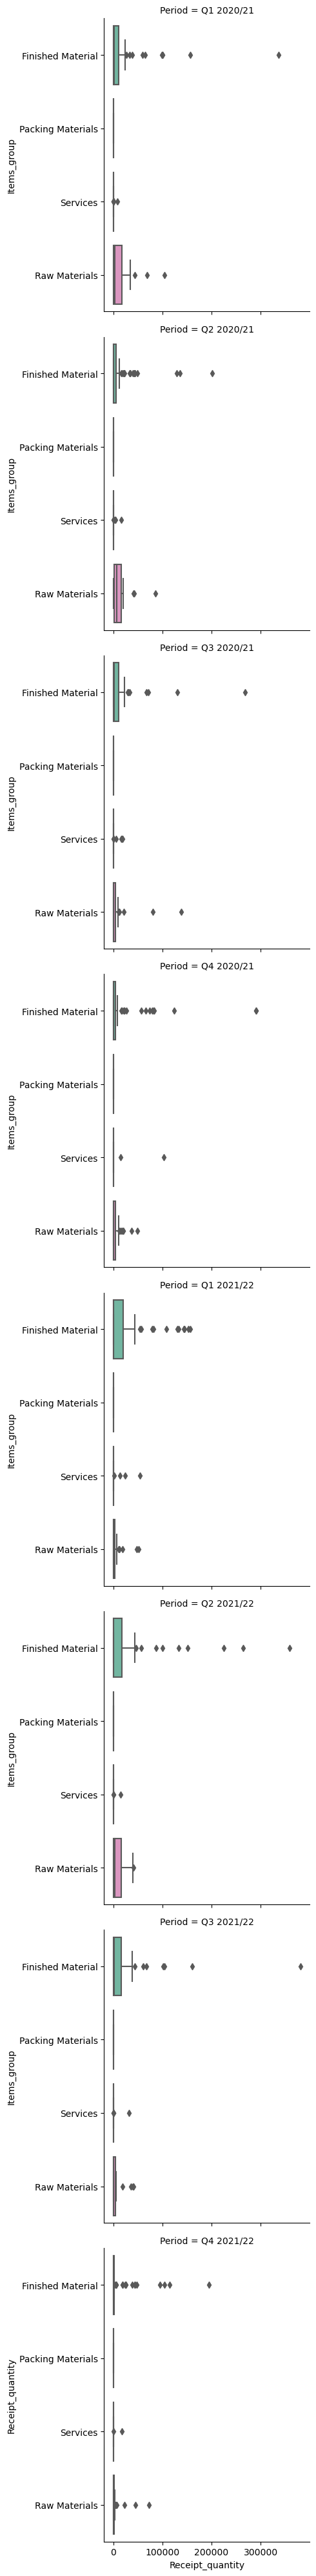

In [49]:
palette01 = sns.color_palette('Set2')
boxplot1 = sns.catplot(x="Receipt_quantity", y='Items_group' , kind="box", row = 'Period', palette = palette01, data=df2)
plt.ylabel('Receipt_quantity')

In [50]:
###ii. Stack Bar chart by TALA Category over Period
palette_color = sns.color_palette('pastel')


df2set1 = df2.groupby(['TALA Category','Year','Period'])['On-hand quantity'].sum().unstack(level=0)
df2set1

TALA Category               PA      PB         PC
Year    Period                                   
2020/21 Q1 2020/21  690570.000 -2376.0  542866.36
        Q2 2020/21  327605.000   -54.0  782124.90
        Q3 2020/21  217310.000     NaN  739501.10
        Q4 2020/21  278857.084 -4860.0  873880.16
2021/22 Q1 2021/22  440606.390  3135.0  683292.47
        Q2 2021/22  412469.000     NaN  825582.00
        Q3 2021/22  208784.000 -2730.0  832895.00
        Q4 2021/22  278707.390 -1621.0  433993.29

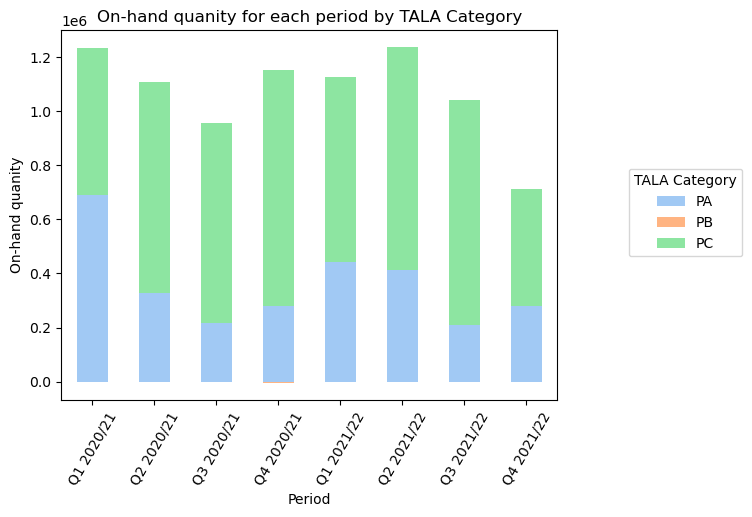

In [51]:
stackedbar0 = df2set1.plot(kind='bar', stacked=True, color=palette_color);
# labels for x & y axis
plt.xlabel('Period')
plt.ylabel('On-hand quanity')
plt.legend(bbox_to_anchor=(1.2,0.5),loc="center right", fontsize=10, title = 'TALA Category', 
          bbox_transform=plt.gcf().transFigure);
# title of plot
stackedbar0.set_xticklabels(labels=['Q1 2020/21','Q2 2020/21','Q3 2020/21','Q4 2020/21','Q1 2021/22','Q2 2021/22','Q3 2021/22','Q4 2021/22'])
plt.title('On-hand quanity for each period by TALA Category')
plt.xticks(rotation=60)
plt.show()

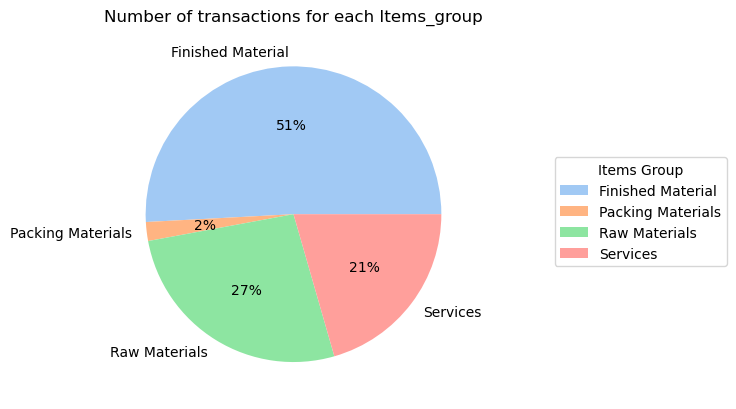

In [52]:
### iii) Pie Chart
set1 = df2.groupby(['Items_group'])['Period'].count()

piechart = plt.pie(set1, labels=set1.index , colors=palette_color, autopct='%.0f%%')
plt.title("Number of transactions for each Items_group")

plt.legend(piechart[0],set1.index, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, title = 'Items Group', 
          bbox_transform=plt.gcf().transFigure);

plt.show()



## Q4. Plot Graph ( all three graphs where direction = Incoming)
    i.  Box Plot  clustered by items_group over period
    ii. Stack bar chart  by  TALA Category over period
    iii. Pie Chart by Items_group


In [53]:
df2set2 = pd.DataFrame(df2.loc[(df2['Direction'] == 'Incoming')]) ##filtering the dataset to only incoming 

In [54]:
myPalette = sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

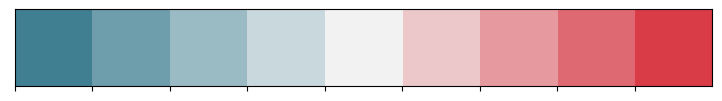

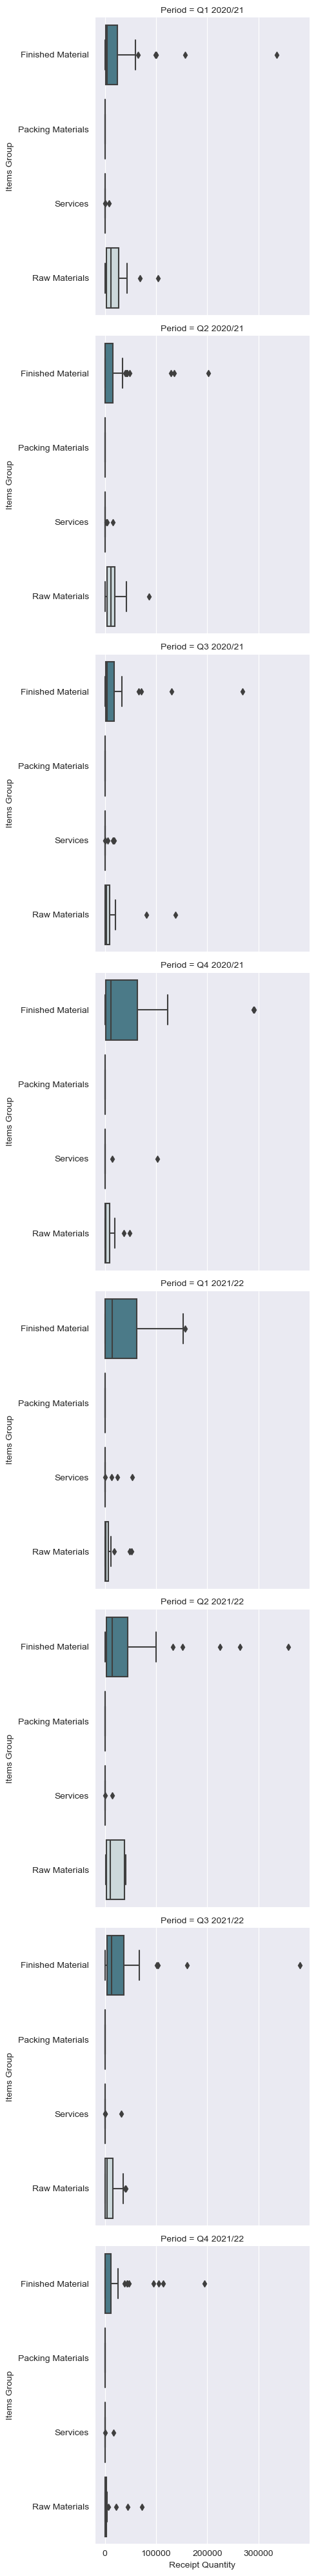

In [55]:
sns.set_style("darkgrid")
boxplot2 = sns.catplot(x="Receipt_quantity", y='Items_group' , kind="box", row = 'Period', palette = myPalette, data=df2set2);

boxplot2.tight_layout()
boxplot2.set_axis_labels(y_var="Items Group", x_var="Receipt Quantity");
plt.show()

In [56]:
df2set3 = df2set2.groupby(['TALA Category', 'Period'])['TALA Category'].count().unstack(level=0)
df2set3

TALA Category    PA   PB    PC
Period                        
Q1 2020/21     44.0  1.0  44.0
Q1 2021/22     40.0  1.0  43.0
Q2 2020/21     26.0  NaN  73.0
Q2 2021/22     25.0  NaN  39.0
Q3 2020/21     35.0  NaN  52.0
Q3 2021/22     25.0  1.0  43.0
Q4 2020/21     33.0  NaN  48.0
Q4 2021/22     43.0  NaN  68.0

In [57]:
#rearrange the dataframe by period
df2set4 = df2set3.reindex(["Q1 2020/21", "Q2 2020/21", "Q3 2020/21", "Q4 2020/21", "Q1 2021/22", "Q2 2021/22", "Q3 2021/22", "Q4 2021/22"])
df2set4

TALA Category    PA   PB    PC
Period                        
Q1 2020/21     44.0  1.0  44.0
Q2 2020/21     26.0  NaN  73.0
Q3 2020/21     35.0  NaN  52.0
Q4 2020/21     33.0  NaN  48.0
Q1 2021/22     40.0  1.0  43.0
Q2 2021/22     25.0  NaN  39.0
Q3 2021/22     25.0  1.0  43.0
Q4 2021/22     43.0  NaN  68.0

In [58]:
palette2 = sns.color_palette("rocket")
#palette2 = sns.choose_diverging_palette()

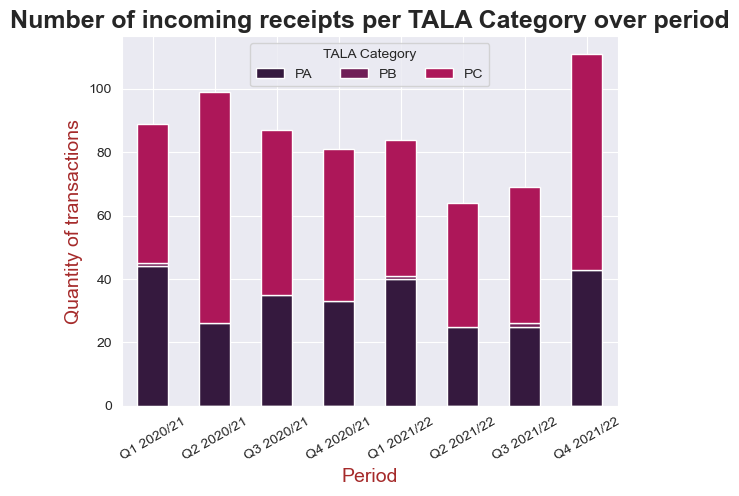

In [59]:
stackedbar1 = df2set4.plot(kind='bar', stacked = True, color = palette2).legend(
    loc='upper center', ncol=3, title="TALA Category");

#labels for x & y axis
plt.xlabel('Period', size=14, color='brown')
plt.ylabel('Quantity of transactions', size=14, color='brown')

#title of plot
plt.title('Number of incoming receipts per TALA Category over period', size=18, weight = "bold")

#rotate x-axis labels
plt.xticks(rotation=30);
plt.show()

In [60]:
df2set5 = df2set2.groupby(['Items_group'])['Period'].count()
df2set5

Items_group
Finished Material    318
Packing Materials     15
Raw Materials        183
Services             168
Name: Period, dtype: int64

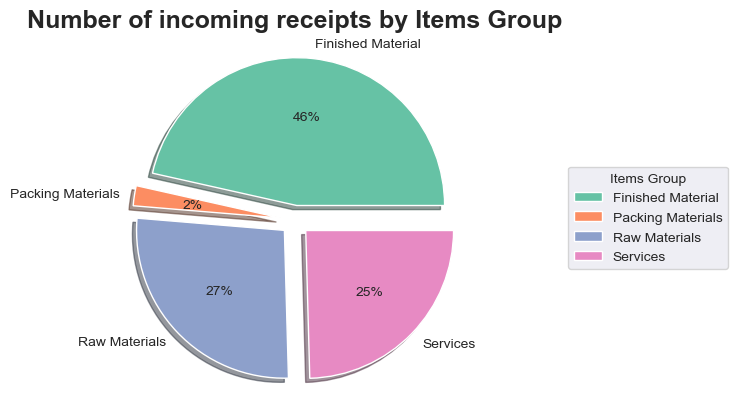

In [61]:
palette3 = sns.color_palette("Set2")

#separate the items group by explode function
mex = [0.1,0.1,0.1,0.1]

piechart1 = plt.pie(df2set5, labels=df2set5.index , colors=palette3, shadow=True, explode = mex, autopct='%.0f%%');

#title of plot
plt.title('Number of incoming receipts by Items Group', size=18, weight='bold');
#plt.legend(loc='right', title="Items Group");

plt.legend(piechart1[0],df2set5.index, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, title = 'Items Group', 
          bbox_transform=plt.gcf().transFigure);
plt.show()

##  Q5 Plot Graph ( all three graphs where direction = Outgoing)
    i) Box Plot  clustered by items_group over period
    ii) ii. Stack bar chart  by  TALA Category over period
    iii) Pie Chart by Items_group

In [62]:
df2set7 = pd.DataFrame(df2.loc[(df2['Direction'] == 'Outgoing')]) ##filtering the dataset to only outgoing 

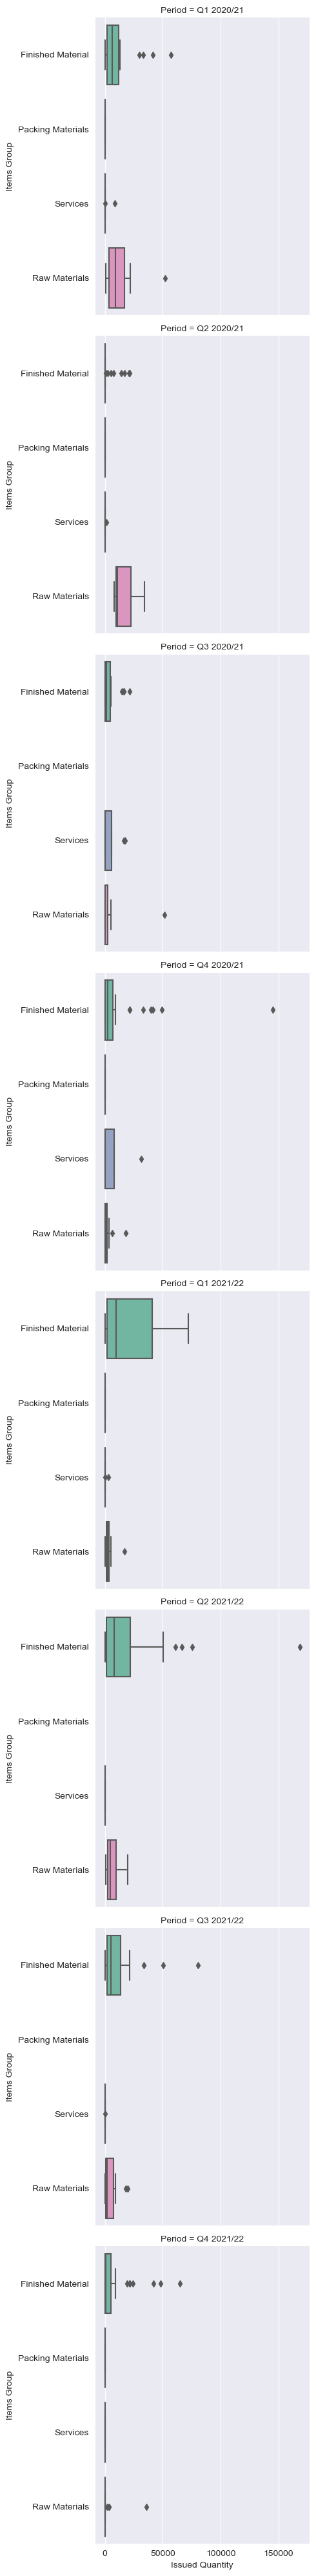

In [63]:
sns.set_style("darkgrid")
boxplot3 = sns.catplot(x="Issue_quantity", y='Items_group' , kind="box", row = 'Period', palette = palette3, data=df2set7);

boxplot3.tight_layout()

boxplot3.set_axis_labels(y_var="Items Group", x_var="Issued Quantity");
plt.show()

In [64]:
df2set8 = df2set7.groupby(['TALA Category', 'Period'])['TALA Category'].count().unstack(level=0)
df2set8

TALA Category    PA   PB    PC
Period                        
Q1 2020/21     26.0  1.0  21.0
Q1 2021/22     28.0  NaN  19.0
Q2 2020/21      8.0  1.0  38.0
Q2 2021/22     25.0  NaN  11.0
Q3 2020/21     24.0  NaN  20.0
Q3 2021/22     24.0  3.0  13.0
Q4 2020/21     40.0  1.0  19.0
Q4 2021/22     19.0  3.0  38.0

In [65]:
#rearrange the dataframe by period
df2set9 = df2set8.reindex(["Q1 2020/21", "Q2 2020/21", "Q3 2020/21", "Q4 2020/21", "Q1 2021/22", "Q2 2021/22", "Q3 2021/22", "Q4 2021/22"])
df2set9

TALA Category    PA   PB    PC
Period                        
Q1 2020/21     26.0  1.0  21.0
Q2 2020/21      8.0  1.0  38.0
Q3 2020/21     24.0  NaN  20.0
Q4 2020/21     40.0  1.0  19.0
Q1 2021/22     28.0  NaN  19.0
Q2 2021/22     25.0  NaN  11.0
Q3 2021/22     24.0  3.0  13.0
Q4 2021/22     19.0  3.0  38.0

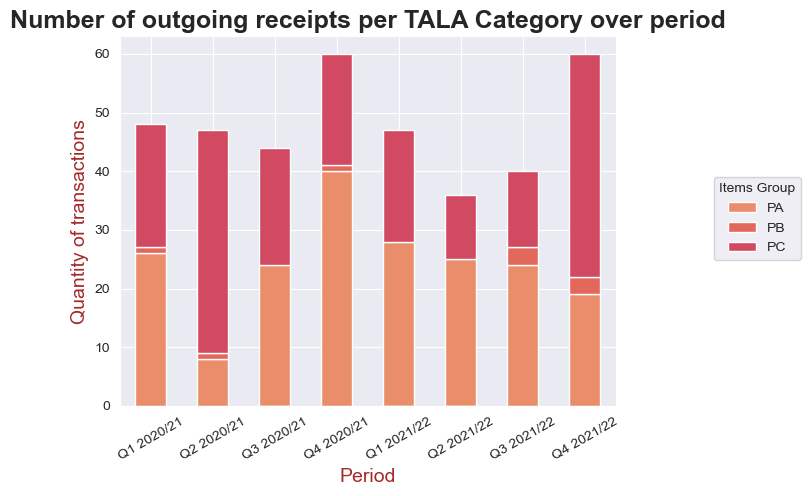

In [66]:
palette4 = sns.color_palette("flare")

stackedbar2 = df2set9.plot(kind='bar', stacked = True, color = palette4).legend(bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, title = 'Items Group', 
          bbox_transform=plt.gcf().transFigure);

#labels for x & y axis
plt.xlabel('Period', size=14, color='brown')
plt.ylabel('Quantity of transactions', size=14, color='brown')

#title of plot
plt.title('Number of outgoing receipts per TALA Category over period', size=18, weight = "bold")

#rotate x-axis labels
plt.xticks(rotation=30);

plt.show()

In [67]:
df2set10 = df2set7.groupby(['Items_group'])['Period'].count() 
df2set10

Items_group
Finished Material    224
Packing Materials      7
Raw Materials        100
Services              51
Name: Period, dtype: int64

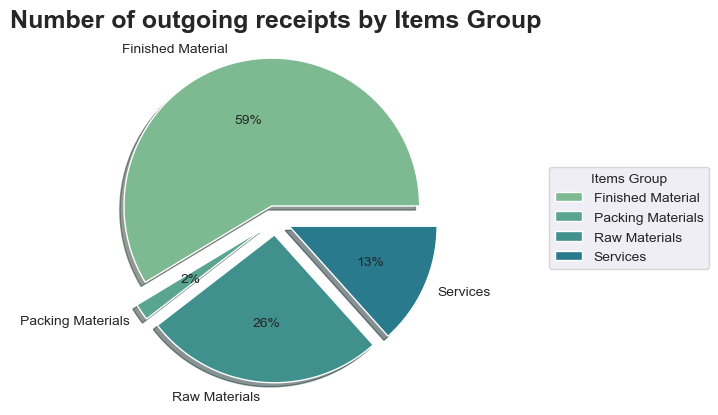

In [68]:
palette5 = sns.color_palette("crest")

#separate the items group by explode function
mex = [0.1,0.1,0.1,0.1]

piechart2 = plt.pie(df2set10, labels=df2set10.index , colors=palette5, shadow=True, explode = mex, autopct='%.0f%%');

#title of plot
plt.title('Number of outgoing receipts by Items Group', size=18, weight='bold');

plt.legend(piechart2[0],df2set10.index, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, title = 'Items Group', 
          bbox_transform=plt.gcf().transFigure);

plt.show()

## Q6. Plot Graph ( all three graphs where direction = Outgoing and TALA category equals to  PA, PB and PC))
    i) Box Plot  clustered by items_group over period
    ii) Pie Chart by Items_group
<br>The data in TALA category is already cleaned to contain only PA, PB and PC values. There is no need to meet the condition and the resulting graphs will be similar to Q5.
<br>These data show the outgoing transactions of the company (invoices)

In [69]:
#i) Box Plot clustered by items_group over period
palette_color = sns.color_palette('pastel') #Setting the color pallete of our chart
df2set11 = pd.DataFrame(df2.loc[(df2['Direction'] == 'Outgoing')]) ##filtering the dataset to only outgoing 
df2set11

Period          Document type TALA Category Direction  \
10    Q1 2020/21  Miscellaneous receipt            PA  Outgoing   
11    Q1 2020/21  Miscellaneous receipt            PA  Outgoing   
32    Q1 2020/21  Miscellaneous receipt            PC  Outgoing   
33    Q1 2020/21  Miscellaneous receipt            PC  Outgoing   
34    Q1 2020/21  Miscellaneous receipt            PC  Outgoing   
...          ...                    ...           ...       ...   
1061  Q4 2021/22       Supplier receipt            PC  Outgoing   
1062  Q4 2021/22       Supplier receipt            PC  Outgoing   
1063  Q4 2021/22       Supplier receipt            PC  Outgoing   
1064  Q4 2021/22       Supplier receipt            PC  Outgoing   
1065  Q4 2021/22       Supplier receipt            PC  Outgoing   

            Items_group                  Item  On-hand quantity  Qty_in_stock  \
10    Finished Material         8338-15/F/244               0.0          0.00   
11    Finished Material  SCAL18080A/F/221/PMO            -992.0      10050.00   
32    Packing Materials         C9007-32B/F/1             -10.0        550.00   
33             Services             Z-EQTK001              -8.0          0.00   
34             Services                Z-PF23              -1.0          0.00   
...                 ...                   ...               ...           ...   
1061  Finished Material         Y-MY004/F/275          -21600.0      24340.00   
1062      Raw Materials      R-3533-15H/F/184           -3680.0       2472.64   
1063      Raw Materials      R-5435-61/F/1000          -36000.0     114877.00   
1064      Raw Materials       R-6532-15/F/180           -2160.0       3420.00   
1065           Services                Z-PF07              -1.0          3.00   

      Receipt_quantity    Stock_Value  Issue_quantity Quarter     Year  
10                 0.0      -5.553700             1.0      Q1  2020/21  
11                 0.0  -13178.843008          1984.0      Q1  2020/21  
32                 0.0       0.000000            10.0      Q1  2020/21  
33                 0.0   -1760.000000             8.0      Q1  2020/21  
34                 0.0   -2040.000000             1.0      Q1  2020/21  
...                ...            ...             ...     ...      ...  
1061               0.0  -48940.567200         21600.0      Q4  2021/22  
1062               0.0  -33941.103680          3680.0      Q4  2021/22  
1063               0.0 -373404.960000         36000.0      Q4  2021/22  
1064               0.0  -75288.210480          2160.0      Q4  2021/22  
1065               0.0   -1200.411480             1.0      Q4  2021/22  

[382 rows x 13 columns]

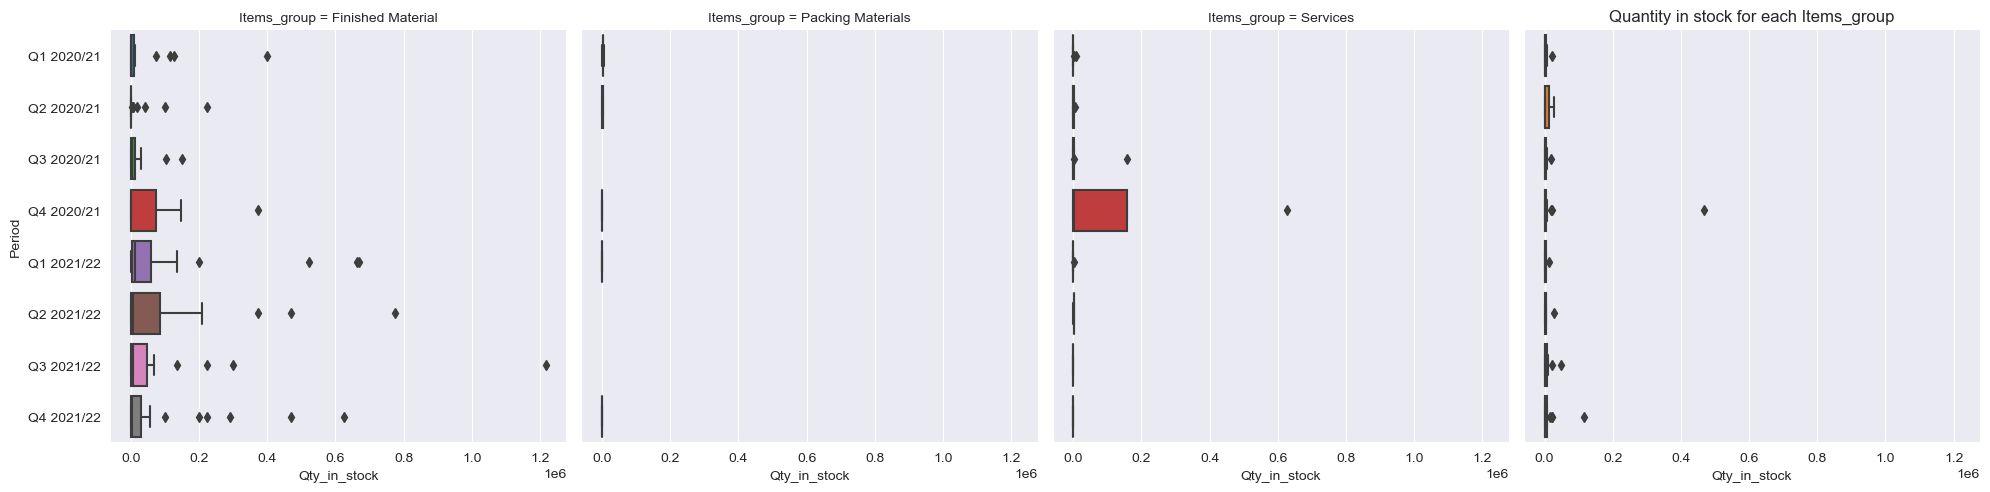

In [70]:
# For each period, the boxplot of qty_in_stock is showed for each items_group
boxplot4 = sns.catplot(x="Qty_in_stock", y='Period' , kind="box",col = 'Items_group', data=df2set11)
plt.title('Quantity in stock for each Items_group')
plt.show()

In [71]:
#ii) Pie Chart by Items_group
df2set12 = df2set11.groupby(['Items_group'])['Items_group'].count() #Grouping each item group and counting each transaction
df2set12

Items_group
Finished Material    224
Packing Materials      7
Raw Materials        100
Services              51
Name: Items_group, dtype: int64

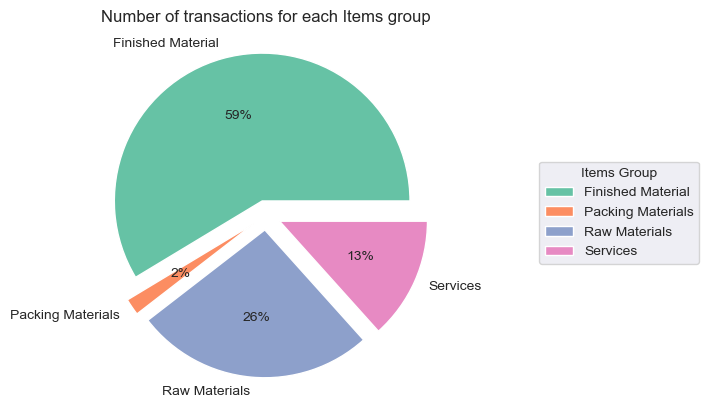

In [72]:
# This shows the percent of each items_group in the number of outgoing transactions
piechart2 = plt.pie(df2set12, labels=df2set12.index , colors=palette3, explode=mex, autopct='%.0f%%')
plt.title("Number of transactions for each Items group")

plt.legend(piechart2[0],df2set12.index, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, title = 'Items Group', 
          bbox_transform=plt.gcf().transFigure);

plt.show()

## Q7. Plot Graph ( all three graphs where direction = Outgoing and TALA category equals to unknown))
    i) Box Plot  clustered by items_group over period
    ii) Pie Chart by Items_group
    iii) Stack Bar Chart by document type
<br>The data in TALA category is already cleaned to contain only PA, PB and PC values so we do not have unknown category. There is no need to meet the condition 'unknown'.
<br>Furthermore, since the direction is also the same as the one in Q6, chart i. and ii. will be the same and we will use the same set. The only chart we will create is the Stack Bar Chart by document type.

In [73]:
#counting the number of transactions for each itemgroup and document type
df2set13 = df2set11.groupby(['Items_group','Document type'])['Items_group'].count().unstack(level=0)

display(df2set13)

Items_group            Finished Material  Packing Materials  Raw Materials  \
Document type                                                                
Miscellaneous issue                 76.0                6.0           48.0   
Miscellaneous receipt                2.0                1.0            NaN   
Supplier receipt                   146.0                NaN           52.0   

Items_group            Services  
Document type                    
Miscellaneous issue        44.0  
Miscellaneous receipt       3.0  
Supplier receipt            4.0

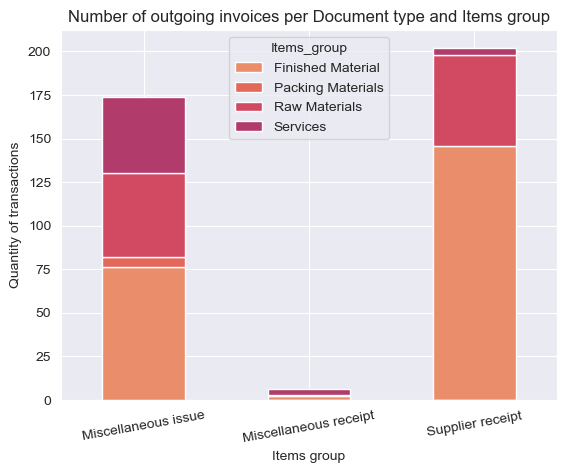

In [74]:
stackedbar3 = df2set13.plot(kind='bar', stacked=True, color=palette4)
# labels for x & y axis
plt.xlabel('Items group')
plt.ylabel('Quantity of transactions')
 
# title of plot
plt.title('Number of outgoing invoices per Document type and Items group')
plt.xticks(rotation=10)
plt.show()

# Q8 Comparison of reporting formats

Box plot, pie chart and stacked bar chart, each of them has its own usage and benefit to display certain type of information based on our dataset. Before selecting the appropriate type of chart, it is important to understand the nature of our dataset. The dataset comprises of quantitative continuous data, which means the continuous variables can take on any numeric value, and it can be meaningfully divided into smaller increments, including fractional and decimal values. 

The continuous variables can be displayed in graphs such as histogram, line chart, scatterplot, box plot, pie chart and stacked bar chart. As our dataset contains time series, it is more appropriate to represent the data in a line chart.

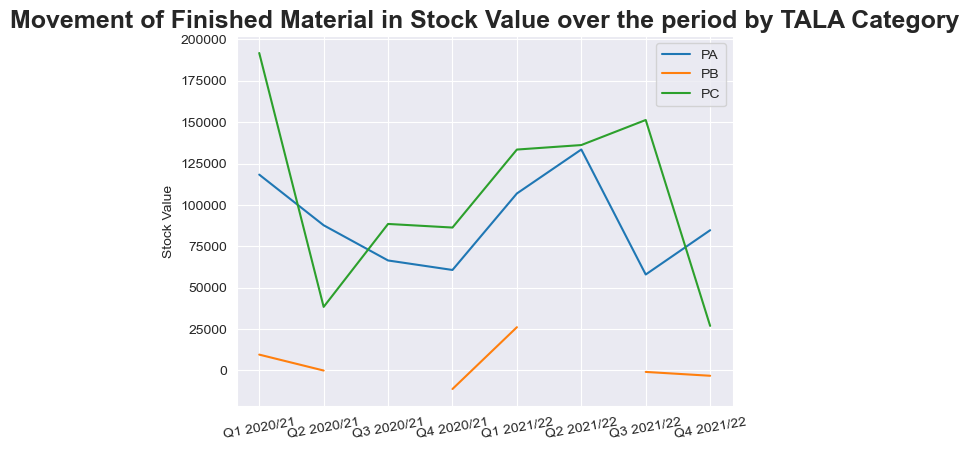

In [75]:
finishedmats = pd.DataFrame(df2.loc[(df2['Items_group'] == 'Finished Material')]) ## Filtering dataset to Finished Material only
# Creating a pivot table to get all stock values for each period and direction
table3 = pd.pivot_table(finishedmats, values='Stock_Value', index=['Period'], columns=['TALA Category']).round(decimals = 2)
table4 = table3.reindex(["Q1 2020/21", "Q2 2020/21", "Q3 2020/21", "Q4 2020/21", "Q1 2021/22", "Q2 2021/22", "Q3 2021/22", "Q4 2021/22"])
#reindexing the order of Periods to be correct
PA = table4["PA"] #Separate Incoming and Outgoing values
PB = table4["PB"]
PC = table4["PC"]
x = list(table4.index) # Making our Periods into a list 
plt.plot(x, PA, label="PA") #Plotting both lines with the legend, rotating x axis labels and labelling the y axis
plt.plot(x, PB, label="PB")
plt.plot(x, PC, label="PC")
plt.legend()
plt.ylabel("Stock Value")
plt.title('Movement of Finished Material in Stock Value over the period by TALA Category', size=18, weight='bold')
plt.xticks(rotation=10)
plt.show()

The changing slope of the line segments emphasizes changes, trends, and patterns over the periods. As we have multiple metrics in terms of TALA Category, we can compare their lines to determine whether they have the same trend and patterns. 

Besides line chart, boxplot is also an equally signifact graph to interpret continuous data. Since we have continuous variables that are divided into groups, a boxplot can be used to display the central tendency and spread of each group. As shown in the below boxplot of receipt quantity clustered by items group over years, we can easily identify the central tendency, spread and the outliers of the items group based on receipt quantity. 

Histograms and box plots are very similar in that they both help to visualize and describe continuous data. Although histograms are better in determining the underlying distribution of the data, box plots allow us to compare multiple data sets better than histograms as they are less detailed and take up less space. 

In conclusion, box plot is more appropriate to visualize the distribution of data in terms of central tendency and spread. Besides that, line chart is also appropriate to compare the trend and pattern of a variable over time. 

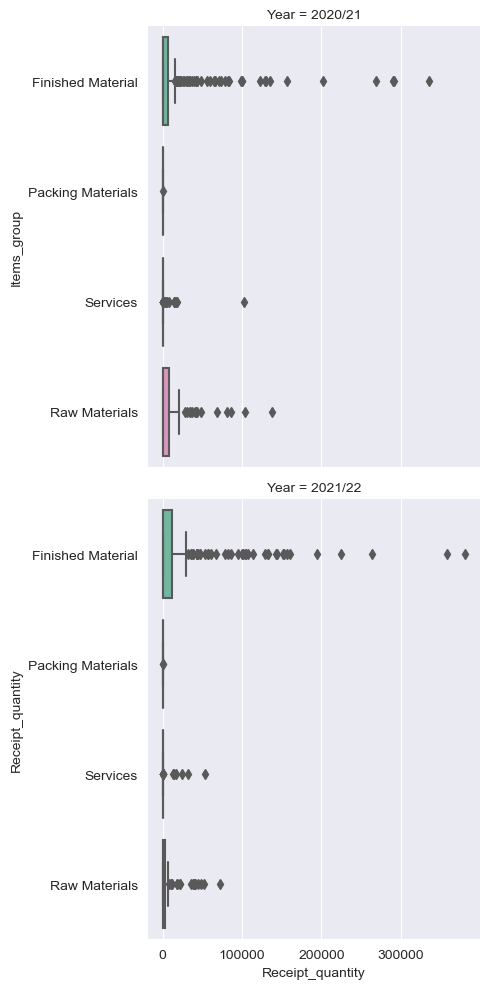

In [76]:
palette01 = sns.color_palette('Set2')
boxplot5 = sns.catplot(x="Receipt_quantity", y='Items_group' , kind="box", row = 'Year', palette = palette01, data=df2)
plt.ylabel('Receipt_quantity')
plt.show()

# Q9 Issues to bring up to Management

At a glance from of the dataset, it can be seen that the company is a manufacturing or B2B or secondary sector company. Over the year, the company receives different 'items' from Finished Material, Packing Materials, Raw Materials and Services. This means that it can be assumed that each row in the dataset is a transaction/invoice that affects the On-hand quantity,Quantity in stock, Receipt Quantity, Stock Value and Issue Quantity. Lastly, each transaction has a corresponding TALA category but without much information and lack of understanding, nothing much could be said regarding this column. 

Firstly, lets examine the incoming transactions of the company

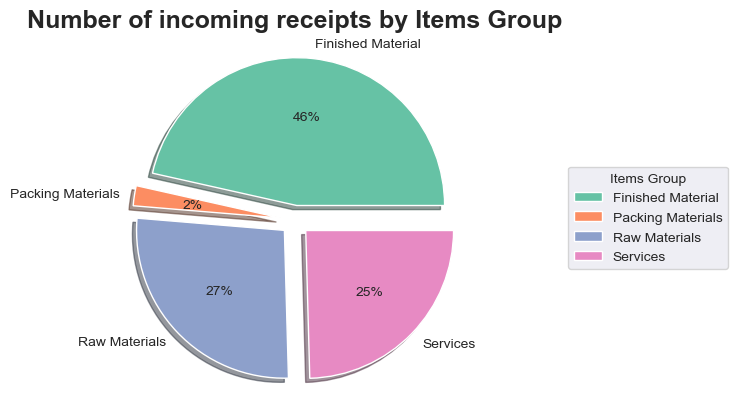

In [77]:
palette3 = sns.color_palette("Set2")

#separate the items group by explode function
mex = [0.1,0.1,0.1,0.1]

piechart1 = plt.pie(df2set5, labels=df2set5.index , colors=palette3, shadow=True, explode = mex, autopct='%.0f%%');

#title of plot
plt.title('Number of incoming receipts by Items Group', size=18, weight='bold');
#plt.legend(loc='right', title="Items Group");

plt.legend(piechart1[0],df2set5.index, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, title = 'Items Group', 
          bbox_transform=plt.gcf().transFigure);
plt.show()

As we can see, Finished Material is the Items_group with the highest number of transactions and likely to be payments from customers purchasing our Finished goods.

Then lets explore the relationship between our Items_group and our quantities

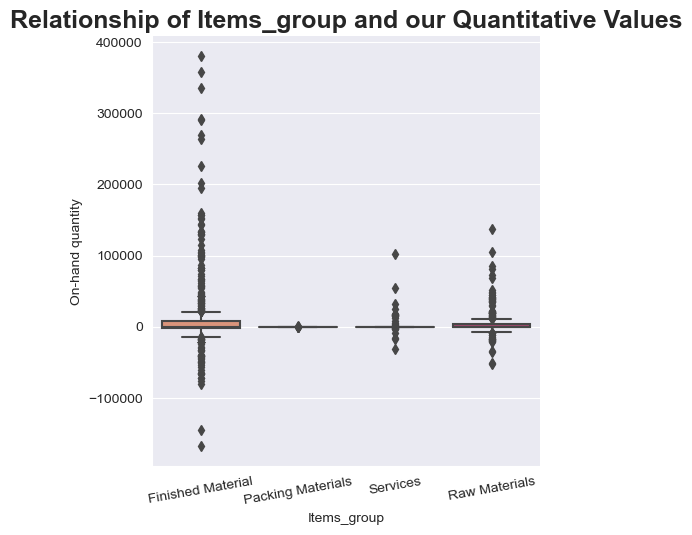

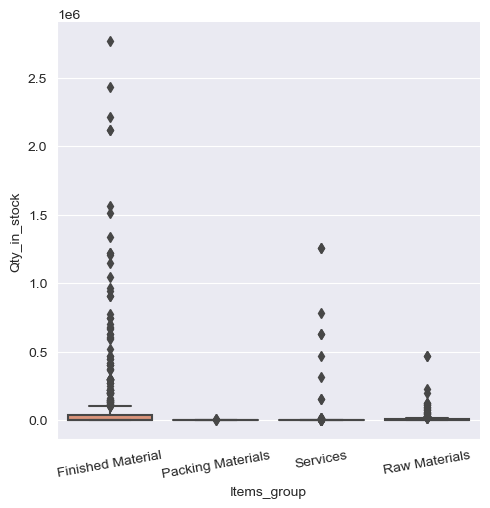

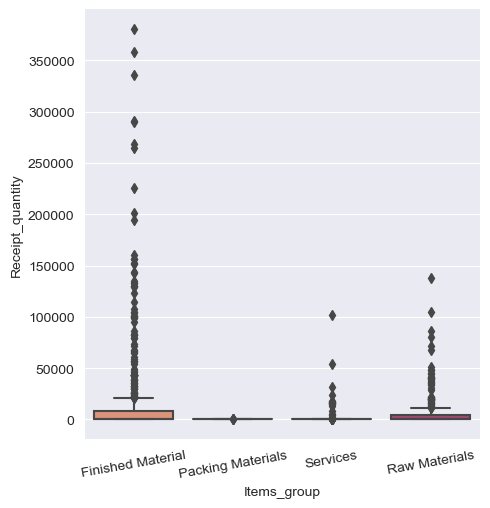

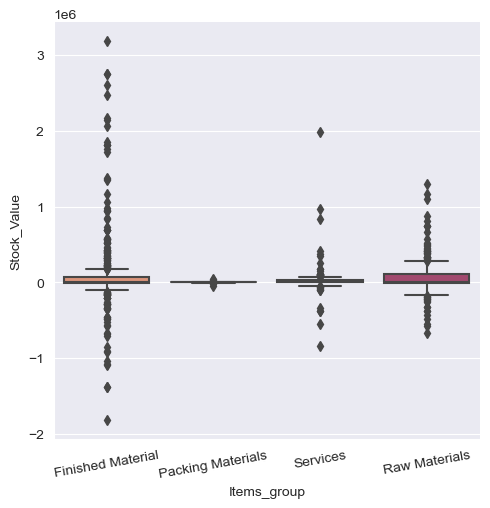

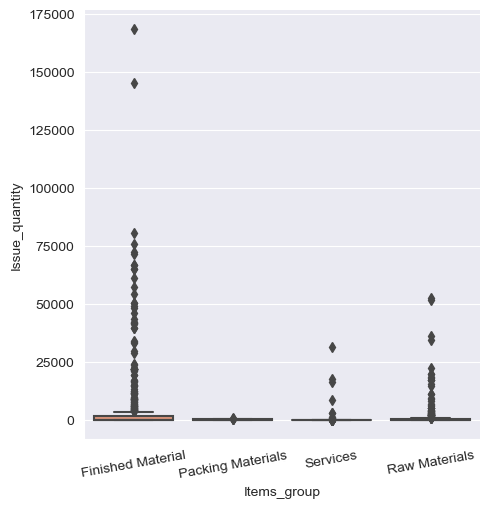

In [78]:

##plotting every Quantitative column with our Items group
fig1= sns.catplot(x="Items_group", y='On-hand quantity' , kind="box", data=df2 ,palette=palette4)
plt.xticks(rotation=10)
plt.title('Relationship of Items_group and our Quantitative Values', size=18, weight='bold')
plt.show()

fig2= sns.catplot(x="Items_group", y='Qty_in_stock' , kind="box", data=df2,palette=palette4)
plt.xticks(rotation=10)
plt.show()

fig3= sns.catplot(x="Items_group", y='Receipt_quantity' , kind="box", data=df2,palette=palette4)
plt.xticks(rotation=10)
plt.show()

fig4= sns.catplot(x="Items_group", y='Stock_Value' , kind="box", data=df2,palette=palette4)
plt.xticks(rotation=10)
plt.show()

fig5= sns.catplot(x="Items_group", y='Issue_quantity' , kind="box", data=df2,palette=palette4)
plt.xticks(rotation=10)
plt.show()

With these boxplots, it can be determined that Finished Material is the item that is most worked with by the company, keeping it most on-hand, having enough stock and purchasing the most of it. This means that they are heavily reliant on these finished material to conduct business by selling,purchasing and keeping finished material in stock (deduced from the Stock_Value). This could be an issue of interest to Management because it is their most worked with Item_group and they would need to strategise methods to mitigate sudden changes in the market like a decrease in demand or lack of supply.

Lets explore the movement of Finished Material over the period for incoming and outgoing invoices for Stock Value.

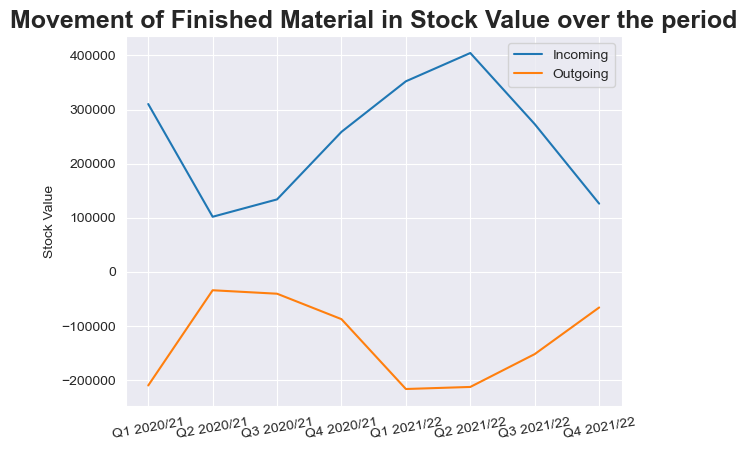

In [79]:
finishedmats = pd.DataFrame(df2.loc[(df2['Items_group'] == 'Finished Material')]) ## Filtering dataset to Finished Material only
# Creating a pivot table to get all stock values for each period and direction
table3 = pd.pivot_table(finishedmats, values='Stock_Value', index=['Period'], columns=['Direction']).round(decimals = 2)
table4 = table3.reindex(["Q1 2020/21", "Q2 2020/21", "Q3 2020/21", "Q4 2020/21", "Q1 2021/22", "Q2 2021/22", "Q3 2021/22", "Q4 2021/22"])
#reindexing the order of Periods to be correct
incoming = table4["Incoming"] #Separate Incoming and Outgoing values
outgoing = table4["Outgoing"]
x = list(table4.index) # Making our Periods into a list 
plt.plot(x, incoming, label="Incoming") #Plotting both lines with the legend, rotating x axis labels and labelling the y axis
plt.plot(x, outgoing, label="Outgoing")
plt.legend()
plt.ylabel("Stock Value")
plt.title('Movement of Finished Material in Stock Value over the period', size=18, weight='bold')
plt.xticks(rotation=10)
plt.show()

From Q1 to Q3 2020/21, Incoming and Outgoing Stock Values returned to zero drastically. This implies the severe decrease in purchasing and selling of finished material. As the change is seen at the start of the 2020/21 fiscal Year, this can be assumed to be around the beginning of covid and the start of the global pandemic where supply chains were severely disrupted which caused many companies in the manufacturing sector to be in a standstill.

Unfortunately, another drop in transactions in finished material is being observed from Q2 2021/22 to Q4 2021/22. The line chart also illustrates that the the all-time-high of Finished Material was only present between Q1 and Q2 2021/22 before the drop-off seen at the start of Q2 2021/22. This is a glaring issue that the management should closely monitor as Finished Material is one of the companies main items. Management should take a long to why transactions with Finished Material has been affected e.g. lack of suppliers/customers, incapability to manufacture, machine breakdowns.

Lets explore another aspect of the company, the document type and direction.

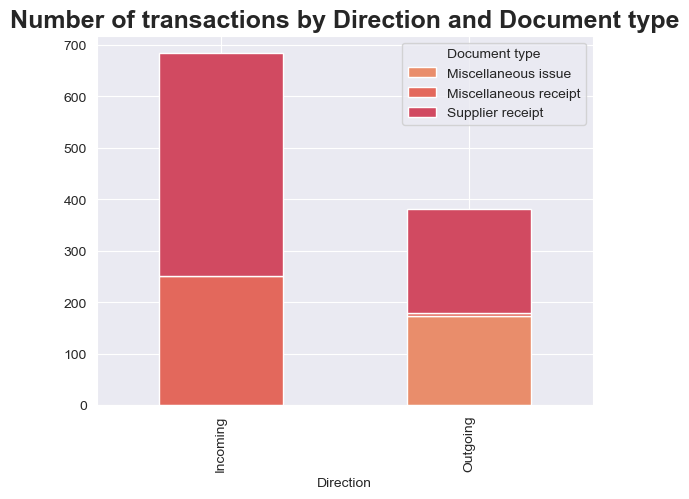

In [80]:
#grouping Document type and Direction together and counting each Document type
explore1 = pd.DataFrame(df2.groupby(['Document type','Direction'])['Document type'].count().unstack(level=0)) 
documentdirection = explore1.plot.bar( stacked=True, color=palette4) #plotting bar chart
plt.title('Number of transactions by Direction and Document type', size=18, weight='bold')
plt.show()


As mentioned, the company sells and purchases from suppliers. However, there is also a number of Miscellaneous issues in our outgoing transactions. This could possibly payments for repairs, refunds and etc. Lets take a closer look at this. 

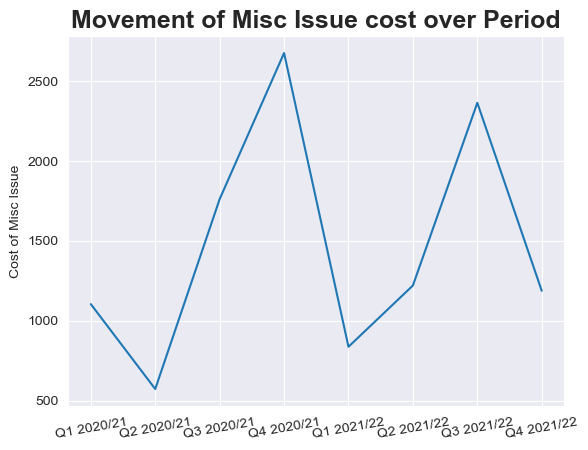

In [81]:
MiscIssue = pd.DataFrame(df2.loc[(df2['Document type'] == 'Miscellaneous issue')]) # Filter to only Misc Issues
#Create a table to filter each period
table5 =  pd.pivot_table(MiscIssue, values='On-hand quantity', index=['Period']).round(decimals = 2) 
# Reorder the period index to be correct order
table6 = table5.reindex(["Q1 2020/21", "Q2 2020/21", "Q3 2020/21", "Q4 2020/21", "Q1 2021/22", "Q2 2021/22", "Q3 2021/22", "Q4 2021/22"])
x = list(table6.index) #List of periods in correct order 
y = table6["On-hand quantity"].abs() #list of values
plt.plot(x,y, label = "On-hand quantity")
plt.ylabel("Cost of Misc Issue")
plt.title('Movement of Misc Issue cost over Period', size=18, weight='bold')
plt.xticks(rotation=10)
plt.show()

With the line graph above, It shows significant Miscellaneous Issues in Q4 2020/21 and Q3 2021/22. The cost of the issues spiked in the aforementioned periods which also relfect the changes in Stock Value for Finished Material. With our 2 line graphs, it suggests that the issues that were caused in Q4 2020/21 and Q3 2021/22 may have disrupted the company's business processes. To help stabilise the company in the future, management should prepare contingency plans for disruptions in the manufacturing process, distribution channels and maintenance on Property, Plant and Equipment.

Revisiting the outgoing invoices from the company, we have the bar graph below to illustrate our findings.

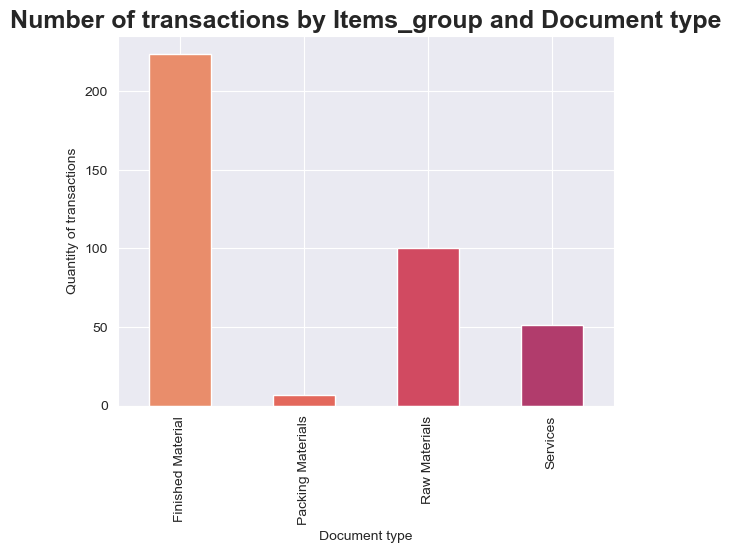

In [82]:
stackedbar3 = df2set12.plot(kind='bar', stacked=True, color=palette4)
plt.xlabel('Document type')
plt.ylabel('Quantity of transactions')
plt.title('Number of transactions by Items_group and Document type', size=18, weight='bold')
plt.show()

With this chart, We can see that Supplier Receipts is approximately 25 transactions more than Issues. This can be a sign of glaring issues in the manufacturing plant of the company and management should take an interest in preventing issues from happening.

Furthermore, this bar graph shows that 75 of the miscellaneous issues consist of Finished Material while the next following majority is from Services and Raw Materials. This implies that issues consist a big portion of the company's outgoing invoices which would cost the company a great amount of money. Secondly, the company has 3 main sources of issues it needs to monitor (Finished Material, Services and Raw Materials). With 3 out of the 4 Items_groups being main sources of issues for the company, management will need to monitor a large scope of the business processes and supply chains to prevent issues from returning again. For example, maintenance on machinery to reduce break downs, getting new suppliers for better raw material quality, cheaper outsourcing/services and many more. It will be up to the management to decide which problems to face but the big picture is that almost half of the company's outgoing transactions consist of miscellaneous issues.

To conclude, the two main issues that management should take an interest on is the over-reliance on Finished Materials for incoming transactions (likely eluding to our sales) and find other venues to receive income as well as minimising and preventing future issues from occuring to reduce the number of outgoing transactions for Miscellaneous Issues which will reduce costs for the business.

# Q10 Dashboard

We will be using the panel library to display our data. As mentioned in this notebook before, due to our data cleaning, Q5,6,7 are basically the same as our dataset is clean enough that the conditions for each question are the same. Instead we used other variables to create each chart. Furthermore, the documentation of Panel states that it can use either Bokeh, Matplotlib and Plotly as a base to visualise plots and charts. For this dashboard we chose matplotlib however, it is still written in the hvplot syntax. **We have issues in visualising pie charts as the documentation does not show any way to visualise Pie charts.** Please see the documentation here. https://hvplot.holoviz.org/user_guide/Plotting.html 

Running a pie chart would result in this error:
**AttributeError: 'hvPlotTabular' object has no attribute 'pie**

In [83]:
##Using the panel library and hvplot to do our dashboard and visualisation

import panel as pn
from panel.interact import interact
pn.extension()

import hvplot
import hvplot.pandas

import holoviews as hv
from holoviews import opts
hv.extension('matplotlib') ## You can choose Bokeh, matplotlib or Plotly to choose which library to use

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [101]:
dashline = finishedmats.groupby(['Period','TALA Category'])['Stock_Value'].mean().round(decimals = 2)
#Group all Period's stock value into a mean and its respectinmg TALA Category

The hvplot library is acting weirdly. **(it follows the matplotlib syntax but instead uses .hvplot rather than .plot)** which caused some x axis labels to display weirdly. However, All of the interactivity still remains functional and servicable.

C:\Users\AJ\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


C:\Users\AJ\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in
C:\Users\AJ\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in
C:\Users\AJ\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  da

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Period', options=['Q1 2020/21', ...], value='Q1 2020/21', width=250)
                [1] VSpacer()
        [4] Markdown(str)
        [5] HoloViews(Bars)
        [6] Markdown(str)
        [7] Markdown(str)
        [8] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Period', options=['Q1 2020/21', ...], value='Q1 2020/21', width=250)
                [1] VSpacer()
        [9] Markdown(str)
        [10] HoloViews(Bars)
        [11] Markdown(str)
        [12] Markdown(str)
        [13] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Period', options=['Q1 2020/21', ...], value='Q1 2020/21', width=250)
                [1] VSpacer()
        [14] Markdown(str)
        [15] HoloViews(Bars)
        [16] Markdown(str)
        [17] Markdown(str)
        [18] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Items_group', options=['Finished Material', ...], value='Finished Material', width=250)
                [1] VSpacer()
        [19] Markdown(str)
        [20] Markdown(str)
        [21] HoloViews(Bars)
        [22] Markdown(str)
        [23] Markdown(str)
        [24] Markdown(str)
        [25] Markdown(str)
        [26] Markdown(str)
        [27] Markdown(str)
        [28] Markdown(str)
        [29] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='TALA Category', options=['PA', 'PB', 'PC'], value='PA', width=250)
                [1] VSpacer()
        [30] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Items_group', options=['Finished Material', ...], value='Finished Material', width=250)
                [1] VSpacer()
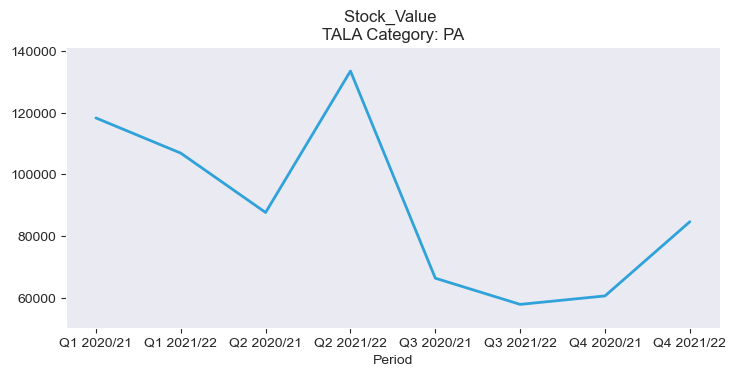
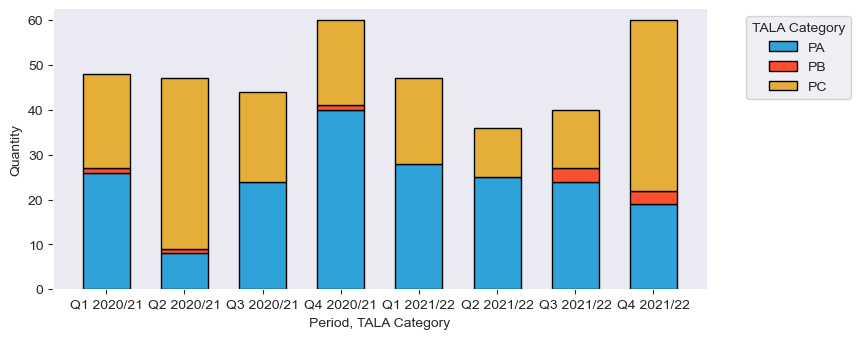
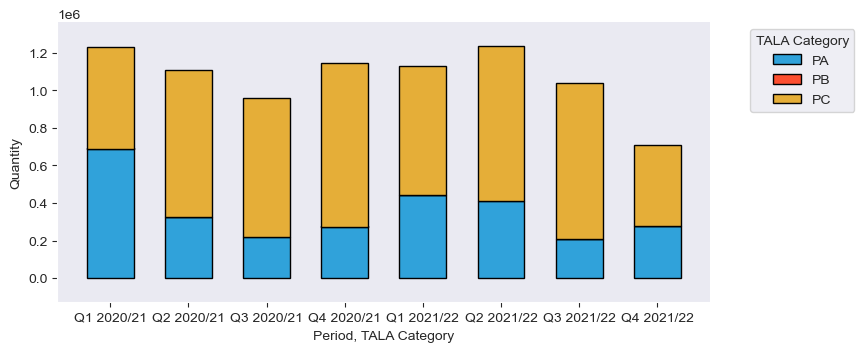
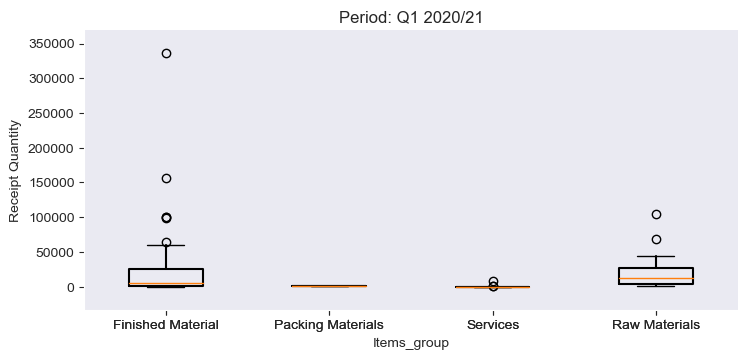
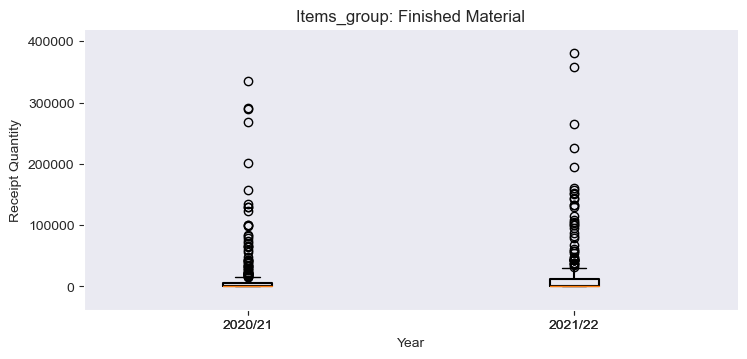
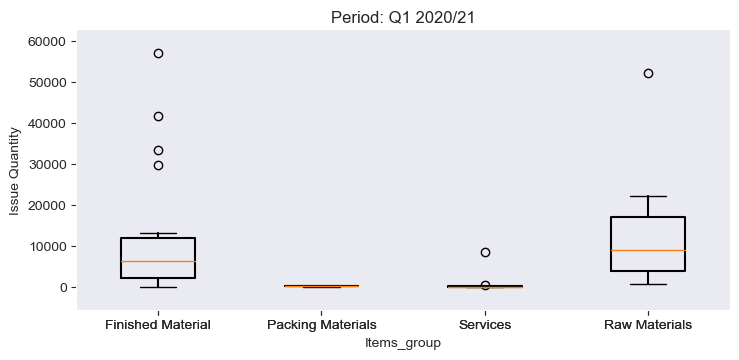
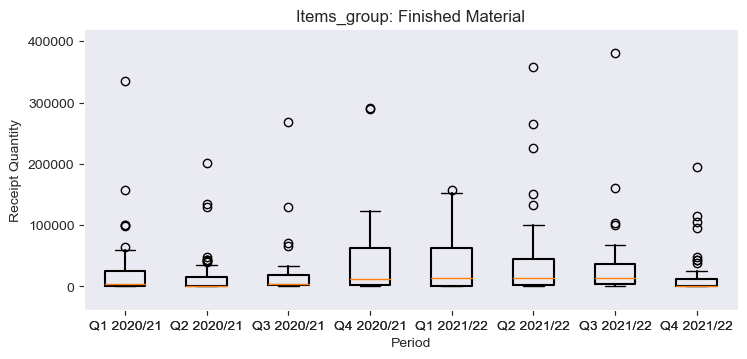
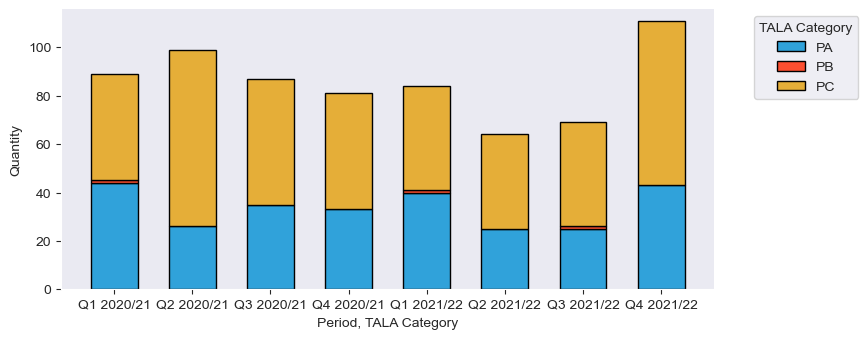
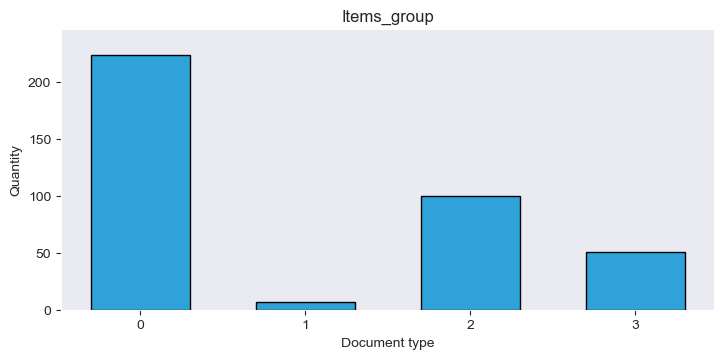
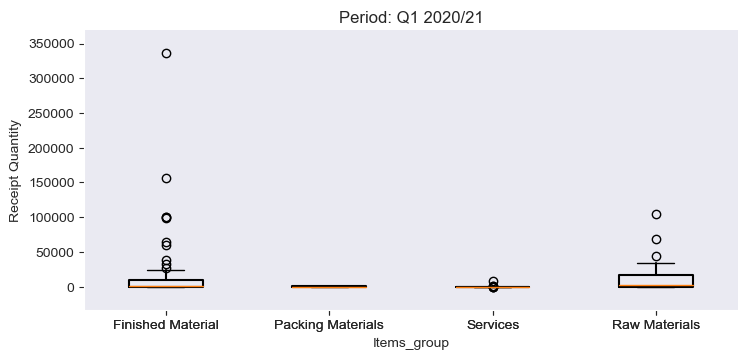

In [99]:
"""" We couldve used the pn.template function instead and created a webpage dashboard but due to lack of time,
we are going to be using the notebook to display our dashboard """ 
"""The code above uses the row and column to display the dashboard in one column and using ## to determine the header size of
each text and titles. Furthermore, each chart is using the hvplot library to allow for interactivity"""
pn.Row(
    pn.Column('# Welcome to our Dashboard',
              '##Q3 All Transactions',
              '### Boxplot clustered by items_group over period',
              df2.hvplot.box(groupby='Period', y='Receipt_quantity',by='Items_group', ylabel='Receipt Quantity'),
              '### Quantity of transactions by TALA Category over the Period',
              df2set1.hvplot.bar(stacked=True, x='Period', y=['PA','PB','PC'], ylabel='Quantity'),
              '##Q4 Incoming Invoices',
              '### Boxplot of Receipt Quantity of each Item over the Period ',
              df2set2.hvplot.box(groupby='Period',y='Receipt_quantity',by='Items_group', ylabel='Receipt Quantity'),
              '### Quantity of transactions by TALA Category over the Period',
              df2set4.hvplot.bar(stacked=True, x='Period', y=['PA','PB','PC'], ylabel='Quantity'),
              '## Q5 Outgoing Invoices',
              '### Boxplot of Issue Quantity of each Item over the Period',
              df2set7.hvplot.box(groupby='Period',y='Issue_quantity',by='Items_group' , ylabel='Issue Quantity'),
              '### Quantity of transactions by TALA Category over the Period',
              df2set9.hvplot.bar(stacked=True, x='Period', y=['PA','PB','PC'], ylabel='Quantity'),
              '## Q6 Outgoing Invoices',
              '### Boxplot of Receipt Quantity of each Item over the Period',
              df2set2.hvplot.box(groupby='Items_group',y='Receipt_quantity',by='Period', ylabel='Receipt Quantity'),
              '## Q7 Outgoing Invoices',
              '### Quantity of transactions by Document type and Items_group',
              df2set12.hvplot.bar(stacked=True, x='Document type', ylabel='Quantity'),
              '## Q8 Comparison of reporting formats',
              '### Box plot, pie chart and stacked bar chart, each of them has its own usage and benefit to display certain type of information based on our dataset. Before selecting the appropriate type of chart, it is important to understand the nature of our dataset. The dataset comprises of quantitative continuous data, which means the continuous variables can take on any numeric value, and it can be meaningfully divided into smaller increments, including fractional and decimal values.', 
              '###The continuous variables can be displayed in graphs such as histogram, line chart, scatterplot, box plot, pie chart and stacked bar chart. As our dataset contains time series, it is more appropriate to represent the data in a line chart.', 
              '###The changing slope of the line segments emphasizes changes, trends, and patterns over the periods. As we have multiple metrics in terms of TALA Category, we can compare their lines to determine whether they have the same trend and patterns.',
            '###Besides line chart, boxplot is also an equally signifact graph to interpret continuous data. Since we have continuous variables that are divided into groups, a boxplot can be used to display the central tendency and spread of each group. As shown in the below boxplot of receipt quantity clustered by items group over years, we can easily identify the central tendency, spread and the outliers of the items group based on receipt quantity.',
            '###Histograms and box plots are very similar in that they both help to visualize and describe continuous data. Although histograms are better in determining the underlying distribution of the data, box plots allow us to compare multiple data sets better than histograms as they are less detailed and take up less space.',
            '###In conclusion, box plot is more appropriate to visualize the distribution of data in terms of central tendency and spread. Besides that, line chart is also appropriate to compare the trend and pattern of a variable over time. Box plot is more appropriate to visualize the distribution of data in terms of central tendency and spread. Besides that, line chart is also appropriate to compare the trend and pattern of a variable over time.',
             dashline.hvplot.line(x='Period', value_label='Stock_Value', groupby='TALA Category'),
             df2.hvplot.box(groupby='Items_group',y='Receipt_quantity',by='Year', ylabel='Receipt Quantity'),
             )
)

